In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('new_thermal_data_AD.csv')

# Replace Tg, Tx, Tl values with new values where they are not null
df.loc[df['Tg_new'].notnull(), 'Tg'] = df['Tg_new']
df.loc[df['Tx_new'].notnull(), 'Tx'] = df['Tx_new']
df.loc[df['Tl_new'].notnull(), 'Tl'] = df['Tl_new']

# Save the modified dataframe to a new CSV file
df.to_csv('ml_dataset_original_updated_26_08_2025.csv', index=False)

print("File updated and saved as 'ml_dataset_original_updated_26_08_2025.csv'")

# 1. Featurizations

In [ ]:
import pandas as pd
from featurization_module import featurize_alloys

# Load the data
df = pd.read_csv("ml_dataset_original_updated_26_08_2025.csv")

# Perform featurization
featurized = featurize_alloys(df, formula_col="Alloys")

# Save to CSV
# 'index=False' prevents pandas from writing a row-number column
featurized.to_csv("featurized_metallic_glass_stage1.csv", index=False)

print(f"Success! Saved {featurized.shape[1]} features for {featurized.shape[0]} samples.")

# 2. Phase Classifications

In [25]:
from trained_stage2_with_predictions_flexible import train_model
results = train_model()


=== TRAINING MODE ===
Raw Phase counts before filtering:
 MMG    1891
CMA     873
MG       94
CMG      19
NAN      14
Name: Phase, dtype: int64
Data after filtering: 2858
Classes: ['CMA', 'Metalic_Glass'] Counts: [ 873 1985]
Fitting feature selection pipeline...
Feature selection completed in 1.56 seconds
Fold 1/5
 NN epoch 1 val_macroF1 0.8892 (best 0.8892)
 NN epoch 20 val_macroF1 0.9669 (best 0.9669)
 NN epoch 40 val_macroF1 0.9697 (best 0.9728)
 NN epoch 60 val_macroF1 0.9727 (best 0.9758)
 NN epoch 80 val_macroF1 0.9699 (best 0.9758)
 NN epoch 100 val_macroF1 0.9611 (best 0.9788)
 Early stopping at epoch 119
 NN epoch 1 val_macroF1 0.9025 (best 0.9025)
 NN epoch 20 val_macroF1 0.9699 (best 0.9727)
 NN epoch 40 val_macroF1 0.9699 (best 0.9758)
 Early stopping at epoch 57
 NN epoch 1 val_macroF1 0.8998 (best 0.8998)
 NN epoch 20 val_macroF1 0.9727 (best 0.9727)
 NN epoch 40 val_macroF1 0.9638 (best 0.9758)
 NN epoch 60 val_macroF1 0.9699 (best 0.9789)
 NN epoch 80 val_macroF1 0.9728

In [26]:
from trained_stage2_with_predictions_flexible import predict_new_data

# If you have already featurized data
predictions = predict_new_data("featurized_metallic_glass_stage1.csv", "predictions.csv")


=== PREDICTION MODE ===
Loading data from: featurized_metallic_glass_stage1.csv

Prediction Summary:
Total samples predicted: 2891

Predicted Phase distribution:
Metalic_Glass    1992
CMA               899
Name: Predicted_Phase, dtype: int64

Predictions saved to: predictions.csv


# 3. Thermal Properties (Tg, Tx, Tl)

Loading featurized data...
Using 2804 samples (at least one of Tg/Tx/Tl present) out of 2891 total samples.

Selecting top features (aggregate importances across targets)...
Saved top features → STAGE3_THERMAL_REGRESSOR_STREAMLINED/stage1_top_features.npy
Saved scaler → STAGE3_THERMAL_REGRESSOR_STREAMLINED/stage1_scaler.joblib
Saved PCA object → STAGE3_THERMAL_REGRESSOR_STREAMLINED/pca_object.joblib

Starting cross-validation training...
Fold 1 | Epoch   1 | Val masked MAE: 879.947 K
Fold 1 | Epoch   2 | Val masked MAE: 879.710 K
Fold 1 | Epoch   3 | Val masked MAE: 879.445 K
Fold 1 | Epoch   4 | Val masked MAE: 879.105 K
Fold 1 | Epoch   5 | Val masked MAE: 878.688 K
Fold 1 | Epoch  50 | Val masked MAE: 60.026 K
Fold 1 | Epoch 100 | Val masked MAE: 48.326 K
Fold 1 | Epoch 150 | Val masked MAE: 31.862 K
Fold 1 | Epoch 200 | Val masked MAE: 30.026 K
Fold 1 | Epoch 250 | Val masked MAE: 26.361 K
Fold 1 | Epoch 300 | Val masked MAE: 22.197 K
Fold 1 | Epoch 350 | Val masked MAE: 21.971 K
F

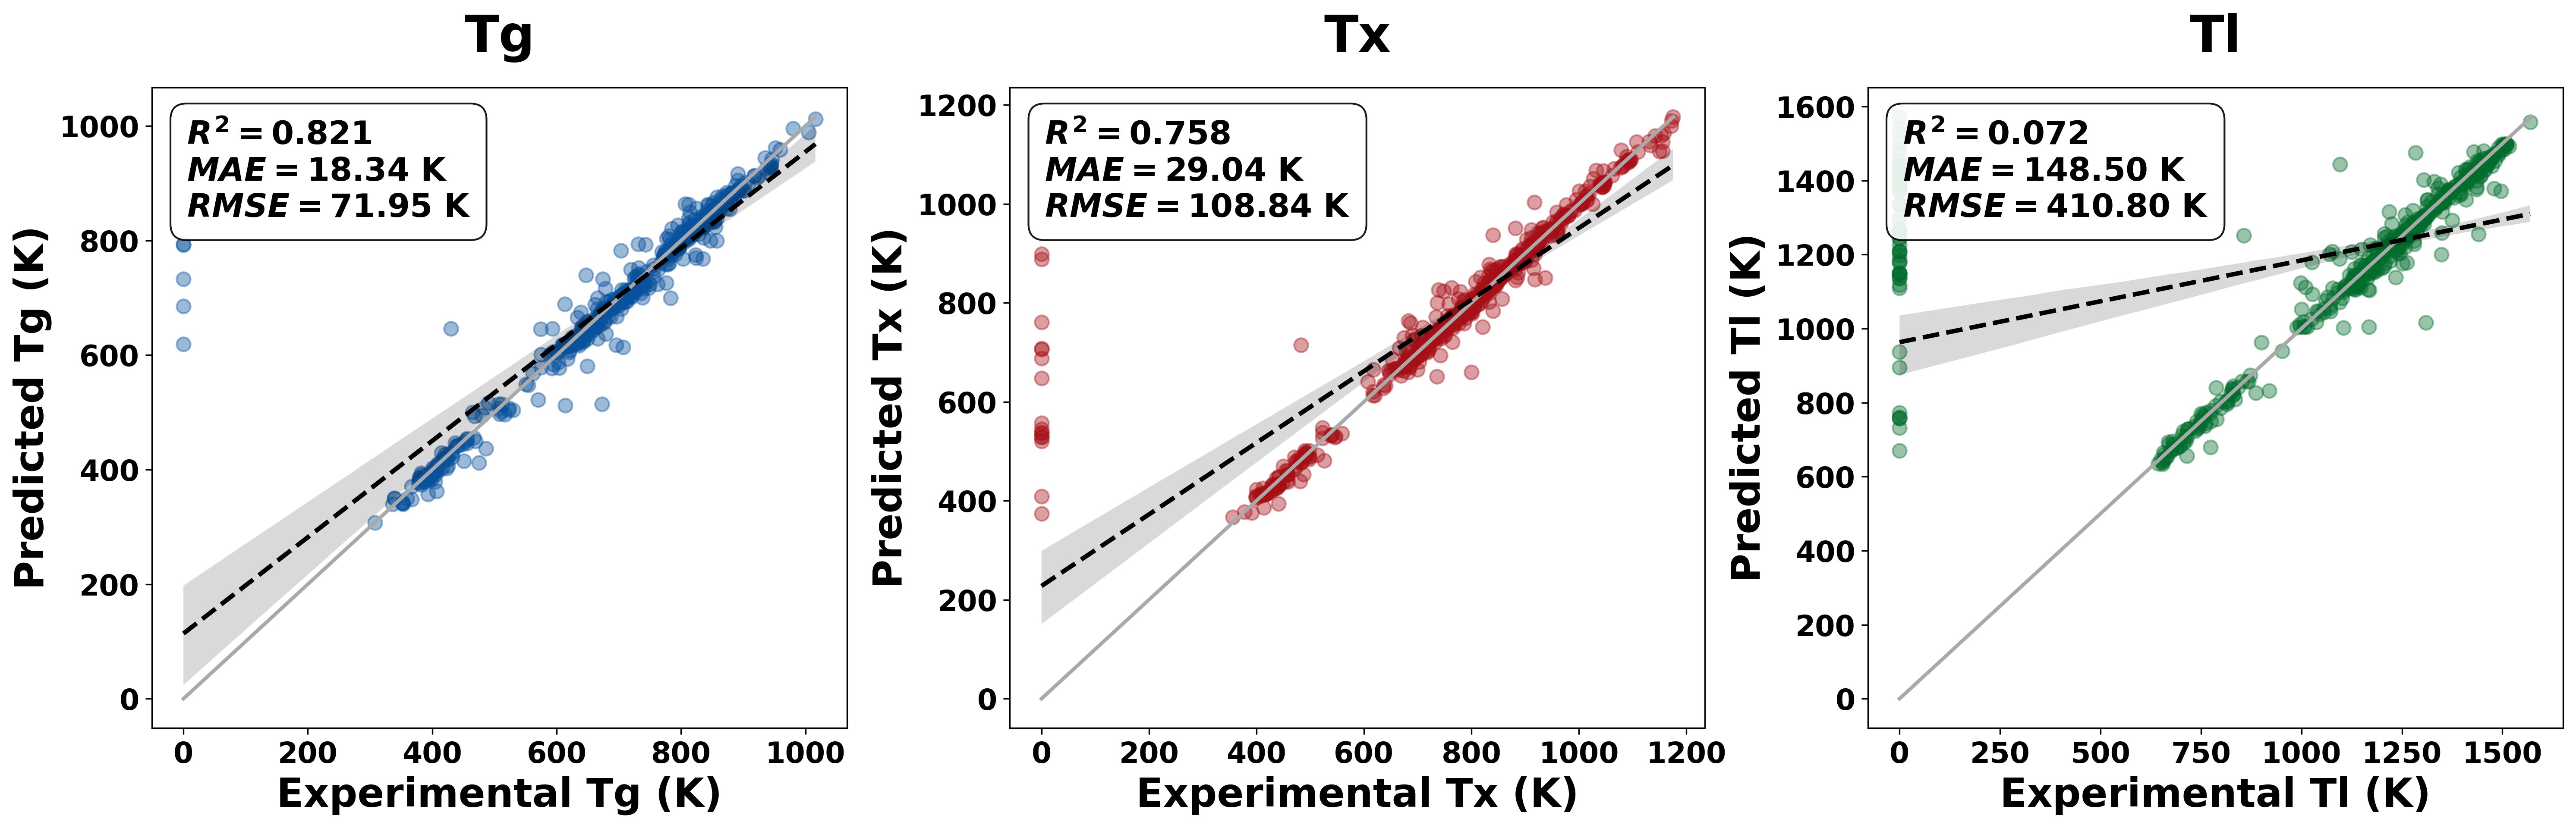

[INFO] Residual summary plot saved as 'STAGE3_THERMAL_REGRESSOR_STREAMLINED/residuals_summary.png'


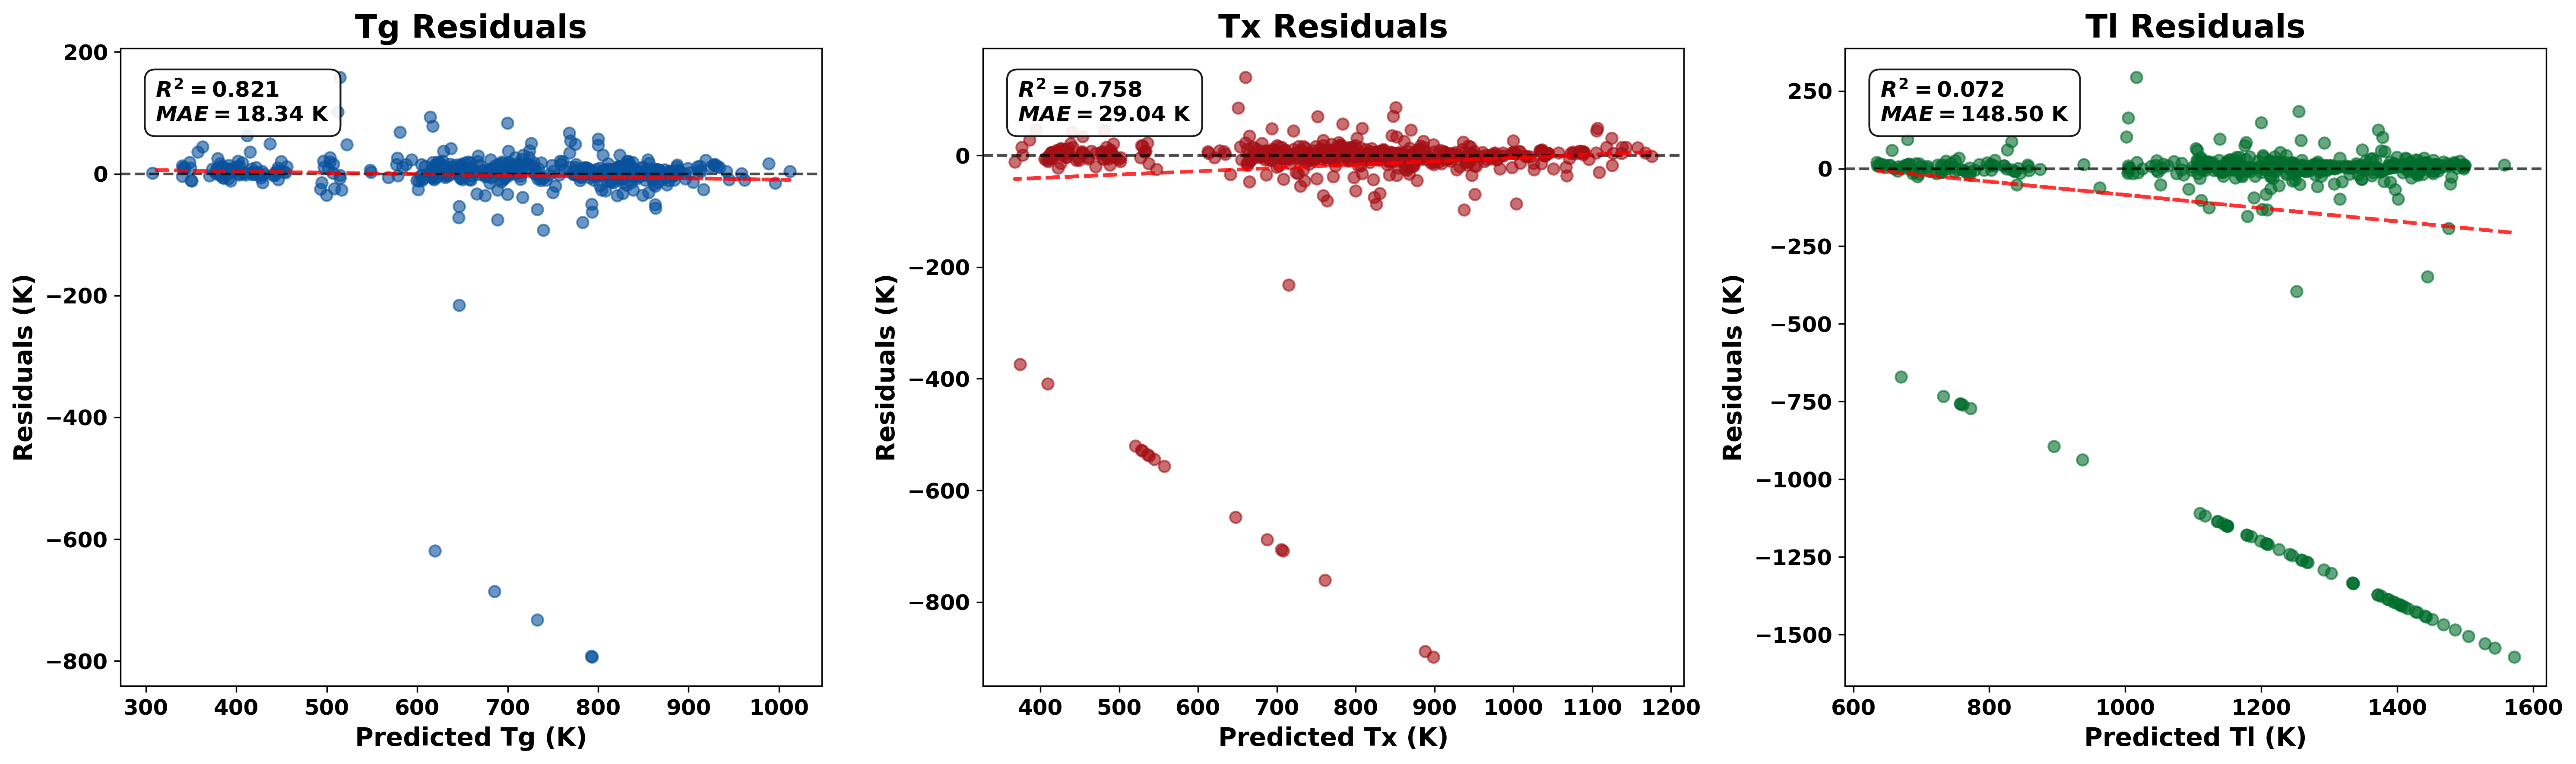

Model architecture saved to STAGE3_THERMAL_REGRESSOR_STREAMLINED/complete_model.pth

[SAVED] All model elements saved to 'STAGE3_THERMAL_REGRESSOR_STREAMLINED' folder:
  - Complete model: STAGE3_THERMAL_REGRESSOR_STREAMLINED/complete_model.pth
  - Model weights: STAGE3_THERMAL_REGRESSOR_STREAMLINED/stage1_regression_model.pth
  - Top features: STAGE3_THERMAL_REGRESSOR_STREAMLINED/stage1_top_features.npy
  - Scaler: STAGE3_THERMAL_REGRESSOR_STREAMLINED/stage1_scaler.joblib
  - Parity plot: STAGE3_THERMAL_REGRESSOR_STREAMLINED/parity_plots_publication.png
  - Residuals summary: STAGE3_THERMAL_REGRESSOR_STREAMLINED/residuals_summary.png
  - Predictions data: STAGE3_THERMAL_REGRESSOR_STREAMLINED/predictions_true_values.npy
  - Training config: STAGE3_THERMAL_REGRESSOR_STREAMLINED/training_config.json

Best model artifact: STAGE3_THERMAL_REGRESSOR_STREAMLINED/stage1_regression_model.pth
All model elements saved in folder: STAGE3_THERMAL_REGRESSOR_STREAMLINED

=== Making predictions on the e

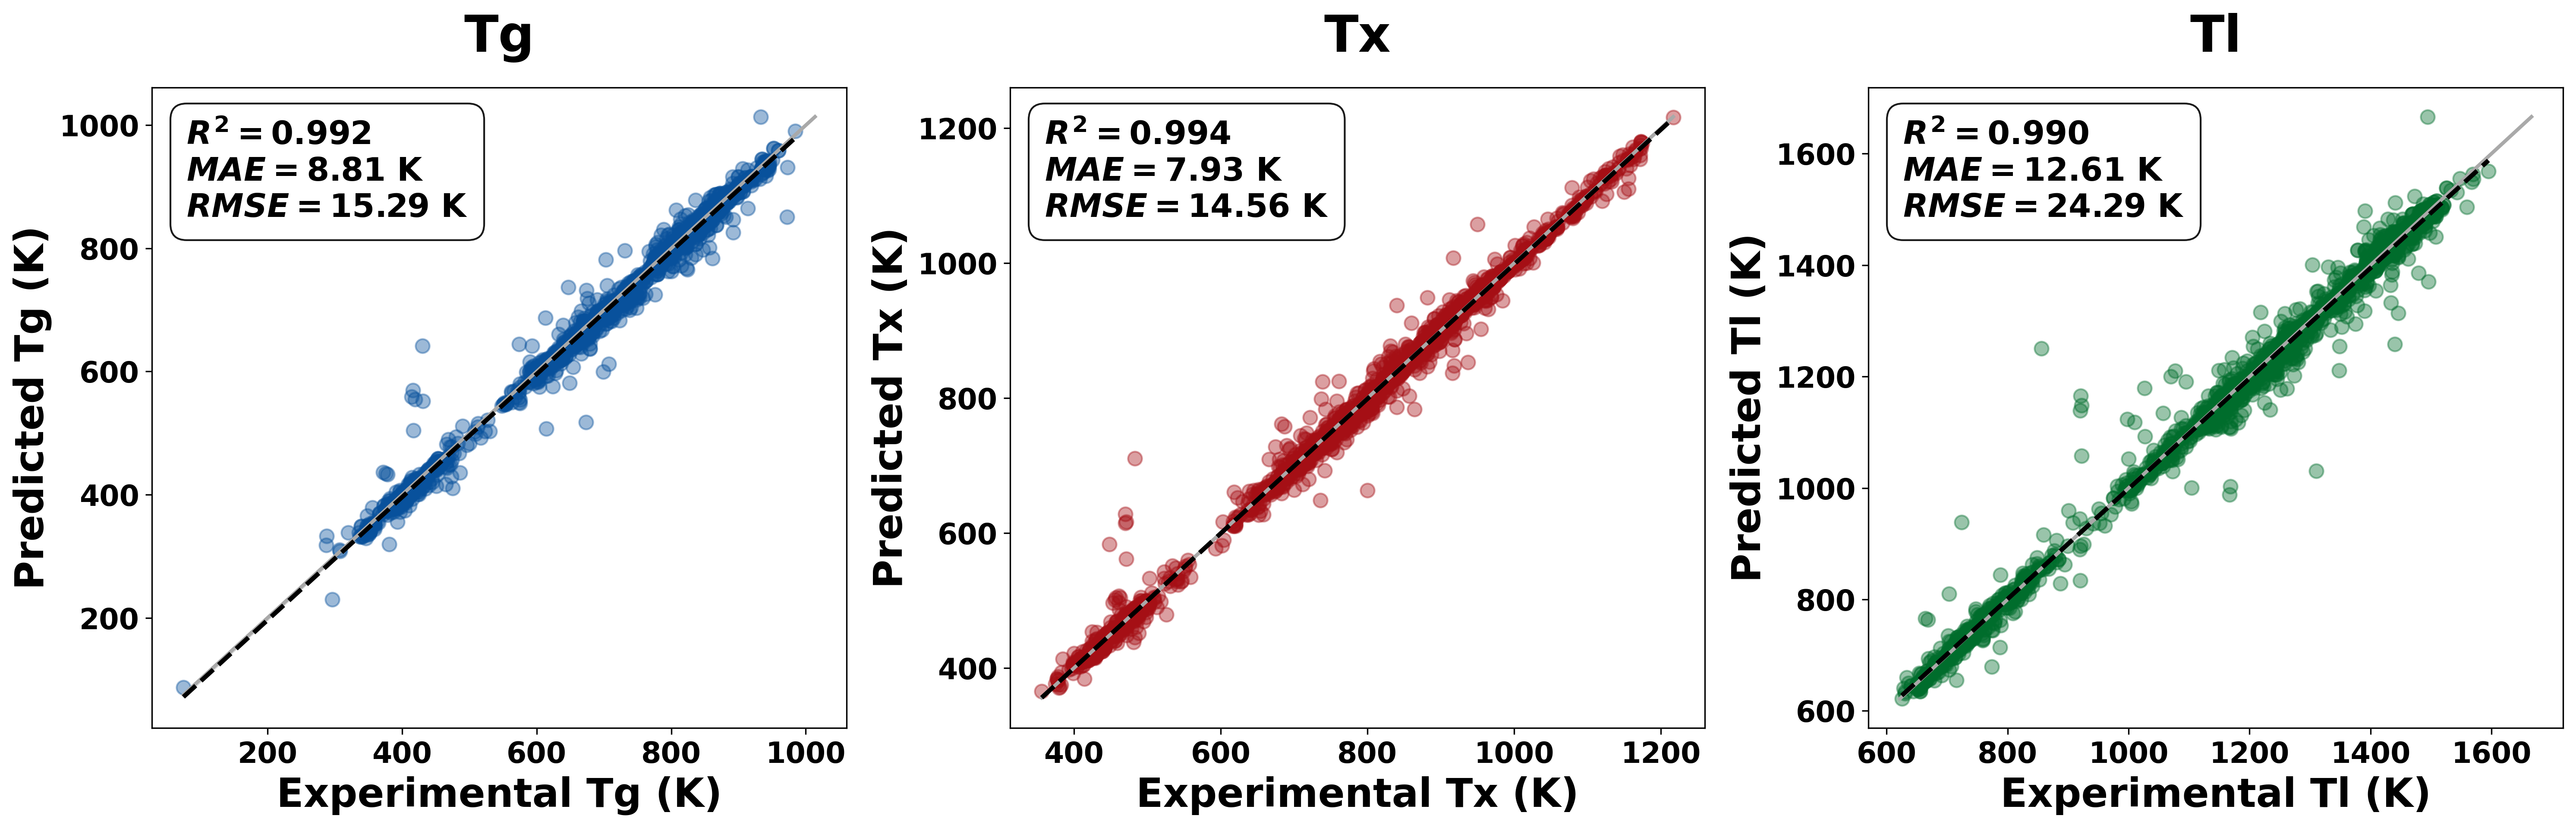

[INFO] Residual summary plot saved as 'STAGE3_THERMAL_REGRESSOR_STREAMLINED/prediction_residuals.png'


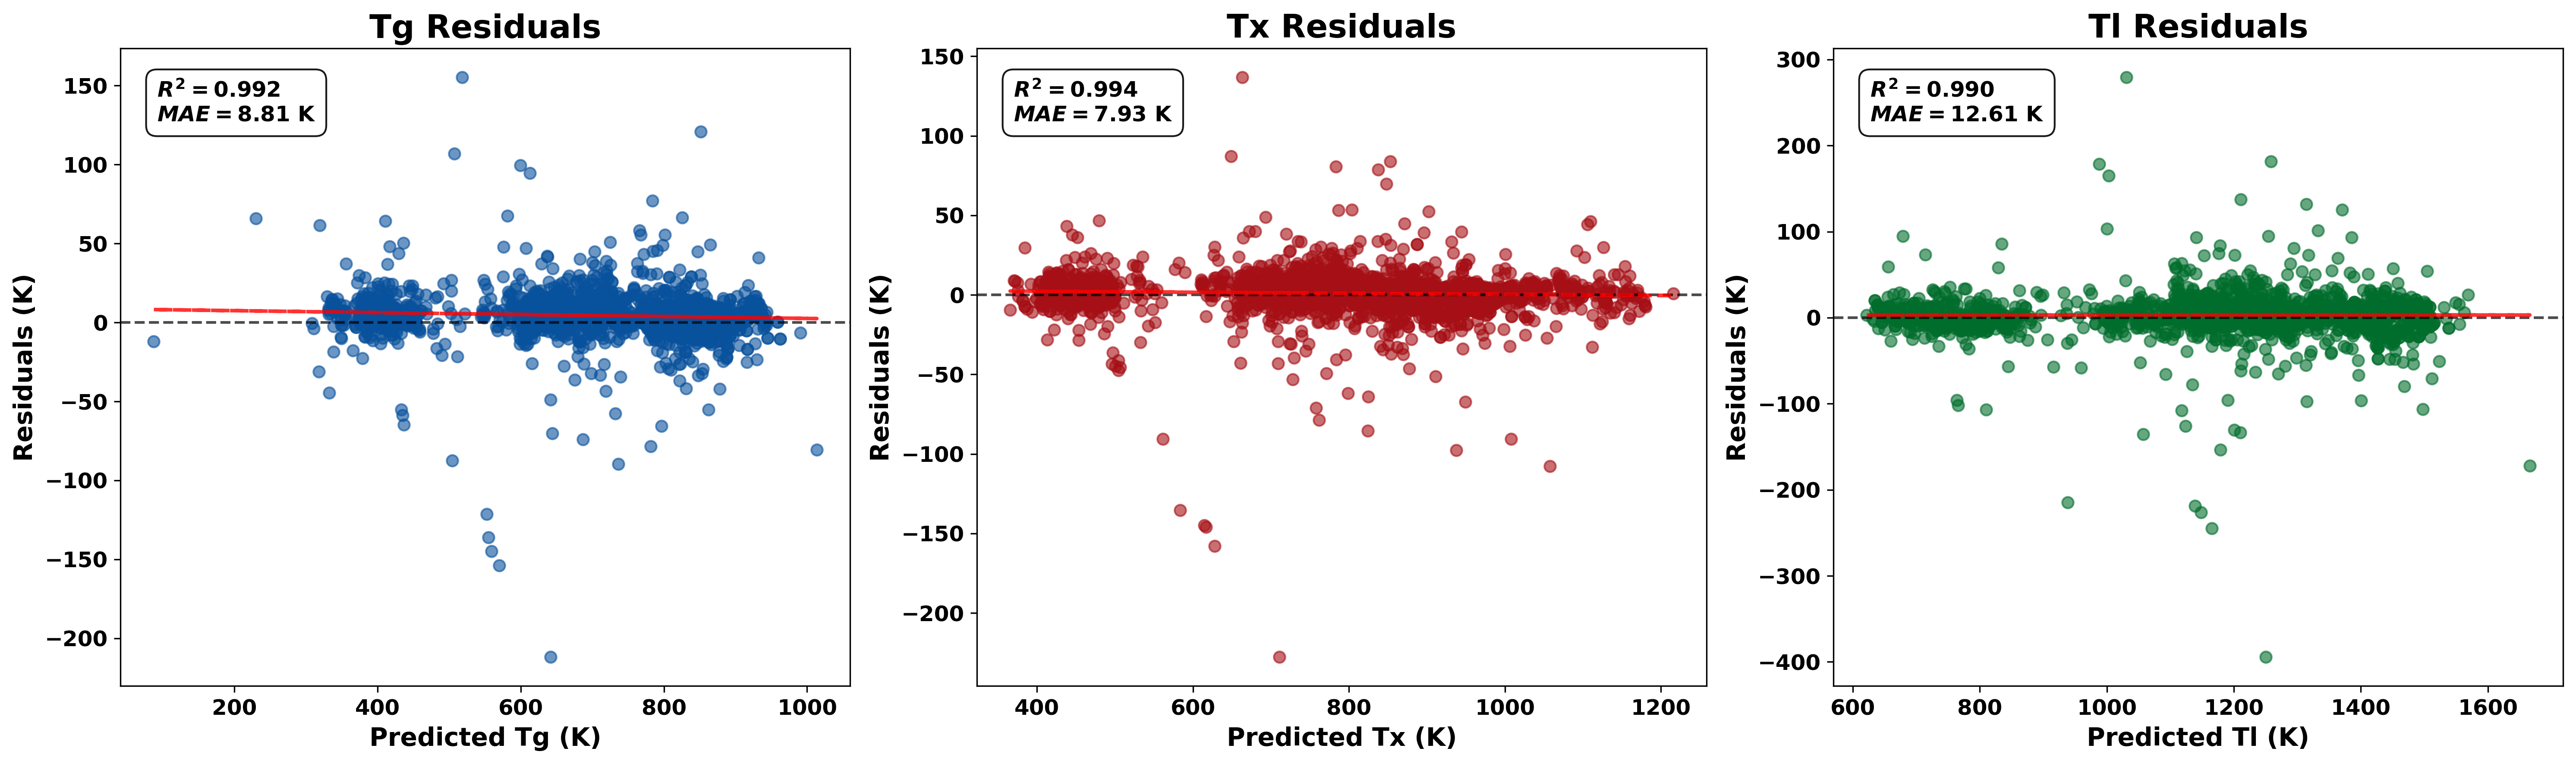

Tg (n=2768): MAE = 9.71 K, R² = 0.988
Tx (n=2730): MAE = 9.36 K, R² = 0.986
Tl (n=2468): MAE = 13.86 K, R² = 0.981

=== All tasks completed successfully! ===


In [1]:
from stage3_thermal_properties import main_train
results2 = main_train()

In [5]:
from stage3_thermal_properties import predict_new_data
predictions2 = predict_new_data("featurized_metallic_glass_stage1.csv", "predictions_thermal.csv")



=== Making predictions on new data ===
Success! Predictions saved to predictions_thermal.csv


In [4]:
import pandas as pd
from featurization_module import featurize_alloys

# Load the data
df = pd.read_csv("your_input_data.csv")

# Perform featurization
featurized = featurize_alloys(df, formula_col="Alloys")

# Save to CSV
# 'index=False' prevents pandas from writing a row-number column
featurized.to_csv("your_input_data_feat.csv", index=False)

print(f"Success! Saved {featurized.shape[1]} features for {featurized.shape[0]} samples.")

from stage3_thermal_properties import predict_new_data
# predictions2 = predict_new_data("featurized_metallic_glass_stage1.csv", "predictions_thermal.csv")
predictions2 = predict_new_data("your_input_data_feat.csv", "predictions_thermal.csv")



========== STAGE-1 FEATURIZATION ==========
Input DataFrame shape: (2891, 7)

--- NaN Report: Thermal features ---
Tg                                  :   2768/2891  ( 95.7%)
Tx                                  :   2730/2891  ( 94.4%)
Tl                                  :   2468/2891  ( 85.4%)
gamma                               :   2413/2891  ( 83.5%)
Trg                                 :   2447/2891  ( 84.6%)
delta_Tx                            :   2697/2891  ( 93.3%)
------------------------------------------------------------
Parsing alloy compositions using matminer...


StrToComposition:   0%|          | 0/2891 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/2891 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/2891 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/2891 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/2891 [00:00<?, ?it/s]

Matminer features added. Total columns now: 160
Computing custom physics features...

--- NaN Report: Custom physics features ---
mixing_entropy_J_per_molK           :   2891/2891  (100.0%)
VEC                                 :   2891/2891  (100.0%)
num_elements                        :   2891/2891  (100.0%)
max_elem_fraction                   :   2891/2891  (100.0%)
min_elem_fraction                   :   2891/2891  (100.0%)
weighted_mean_atomic_number         :   2891/2891  (100.0%)
weighted_std_atomic_number          :   2891/2891  (100.0%)
weighted_mean_atomic_weight         :   2891/2891  (100.0%)
weighted_std_atomic_weight          :   2891/2891  (100.0%)
weighted_mean_electronegativity     :   2891/2891  (100.0%)
weighted_std_electronegativity      :   2891/2891  (100.0%)
atomic_size_mismatch_delta          :   2891/2891  (100.0%)
weighted_mean_atomic_radius         :   2891/2891  (100.0%)
weighted_std_atomic_radius          :   2891/2891  (100.0%)
weighted_range_atomic_radius  

In [7]:
import numpy as np
import pandas as pd
import joblib

# Load your new featurized data
df_new = pd.read_csv("your_input_data_feat.csv")

# Load training artifacts
top_features = np.load("STAGE3_THERMAL_REGRESSOR_STREAMLINED/stage1_top_features.npy", allow_pickle=True)

# Compare
print(f"Features expected: {len(top_features)}")
found = [f for f in top_features if f in df_new.columns]
missing = [f for f in top_features if f not in df_new.columns]

print(f"Features found: {len(found)}")
print(f"Features missing: {len(missing)}")
if len(missing) > 0:
    print(f"First 5 missing: {missing[:5]}")

Features expected: 100
Features found: 95
Features missing: 5
First 5 missing: ['Dmax', 'gamma', 'Trg', 'delta_Tx', 'Tg_new']


# 4. Dmax

=== TRAINING MODE ===
Loading data...
Selecting top 80 features...

--- Starting Fold 1 ---
Fold 1 | Best Val MAE (log): 0.2198

--- Starting Fold 2 ---
Fold 2 | Best Val MAE (log): 0.2116

--- Starting Fold 3 ---
Fold 3 | Best Val MAE (log): 0.2068

--- Starting Fold 4 ---
Fold 4 | Best Val MAE (log): 0.2601

--- Starting Fold 5 ---
Fold 5 | Best Val MAE (log): 0.2063

[INFO] Parity plot saved as 'STAGE4_DMAX_REGRESSOR/dmax_parity_log.png'


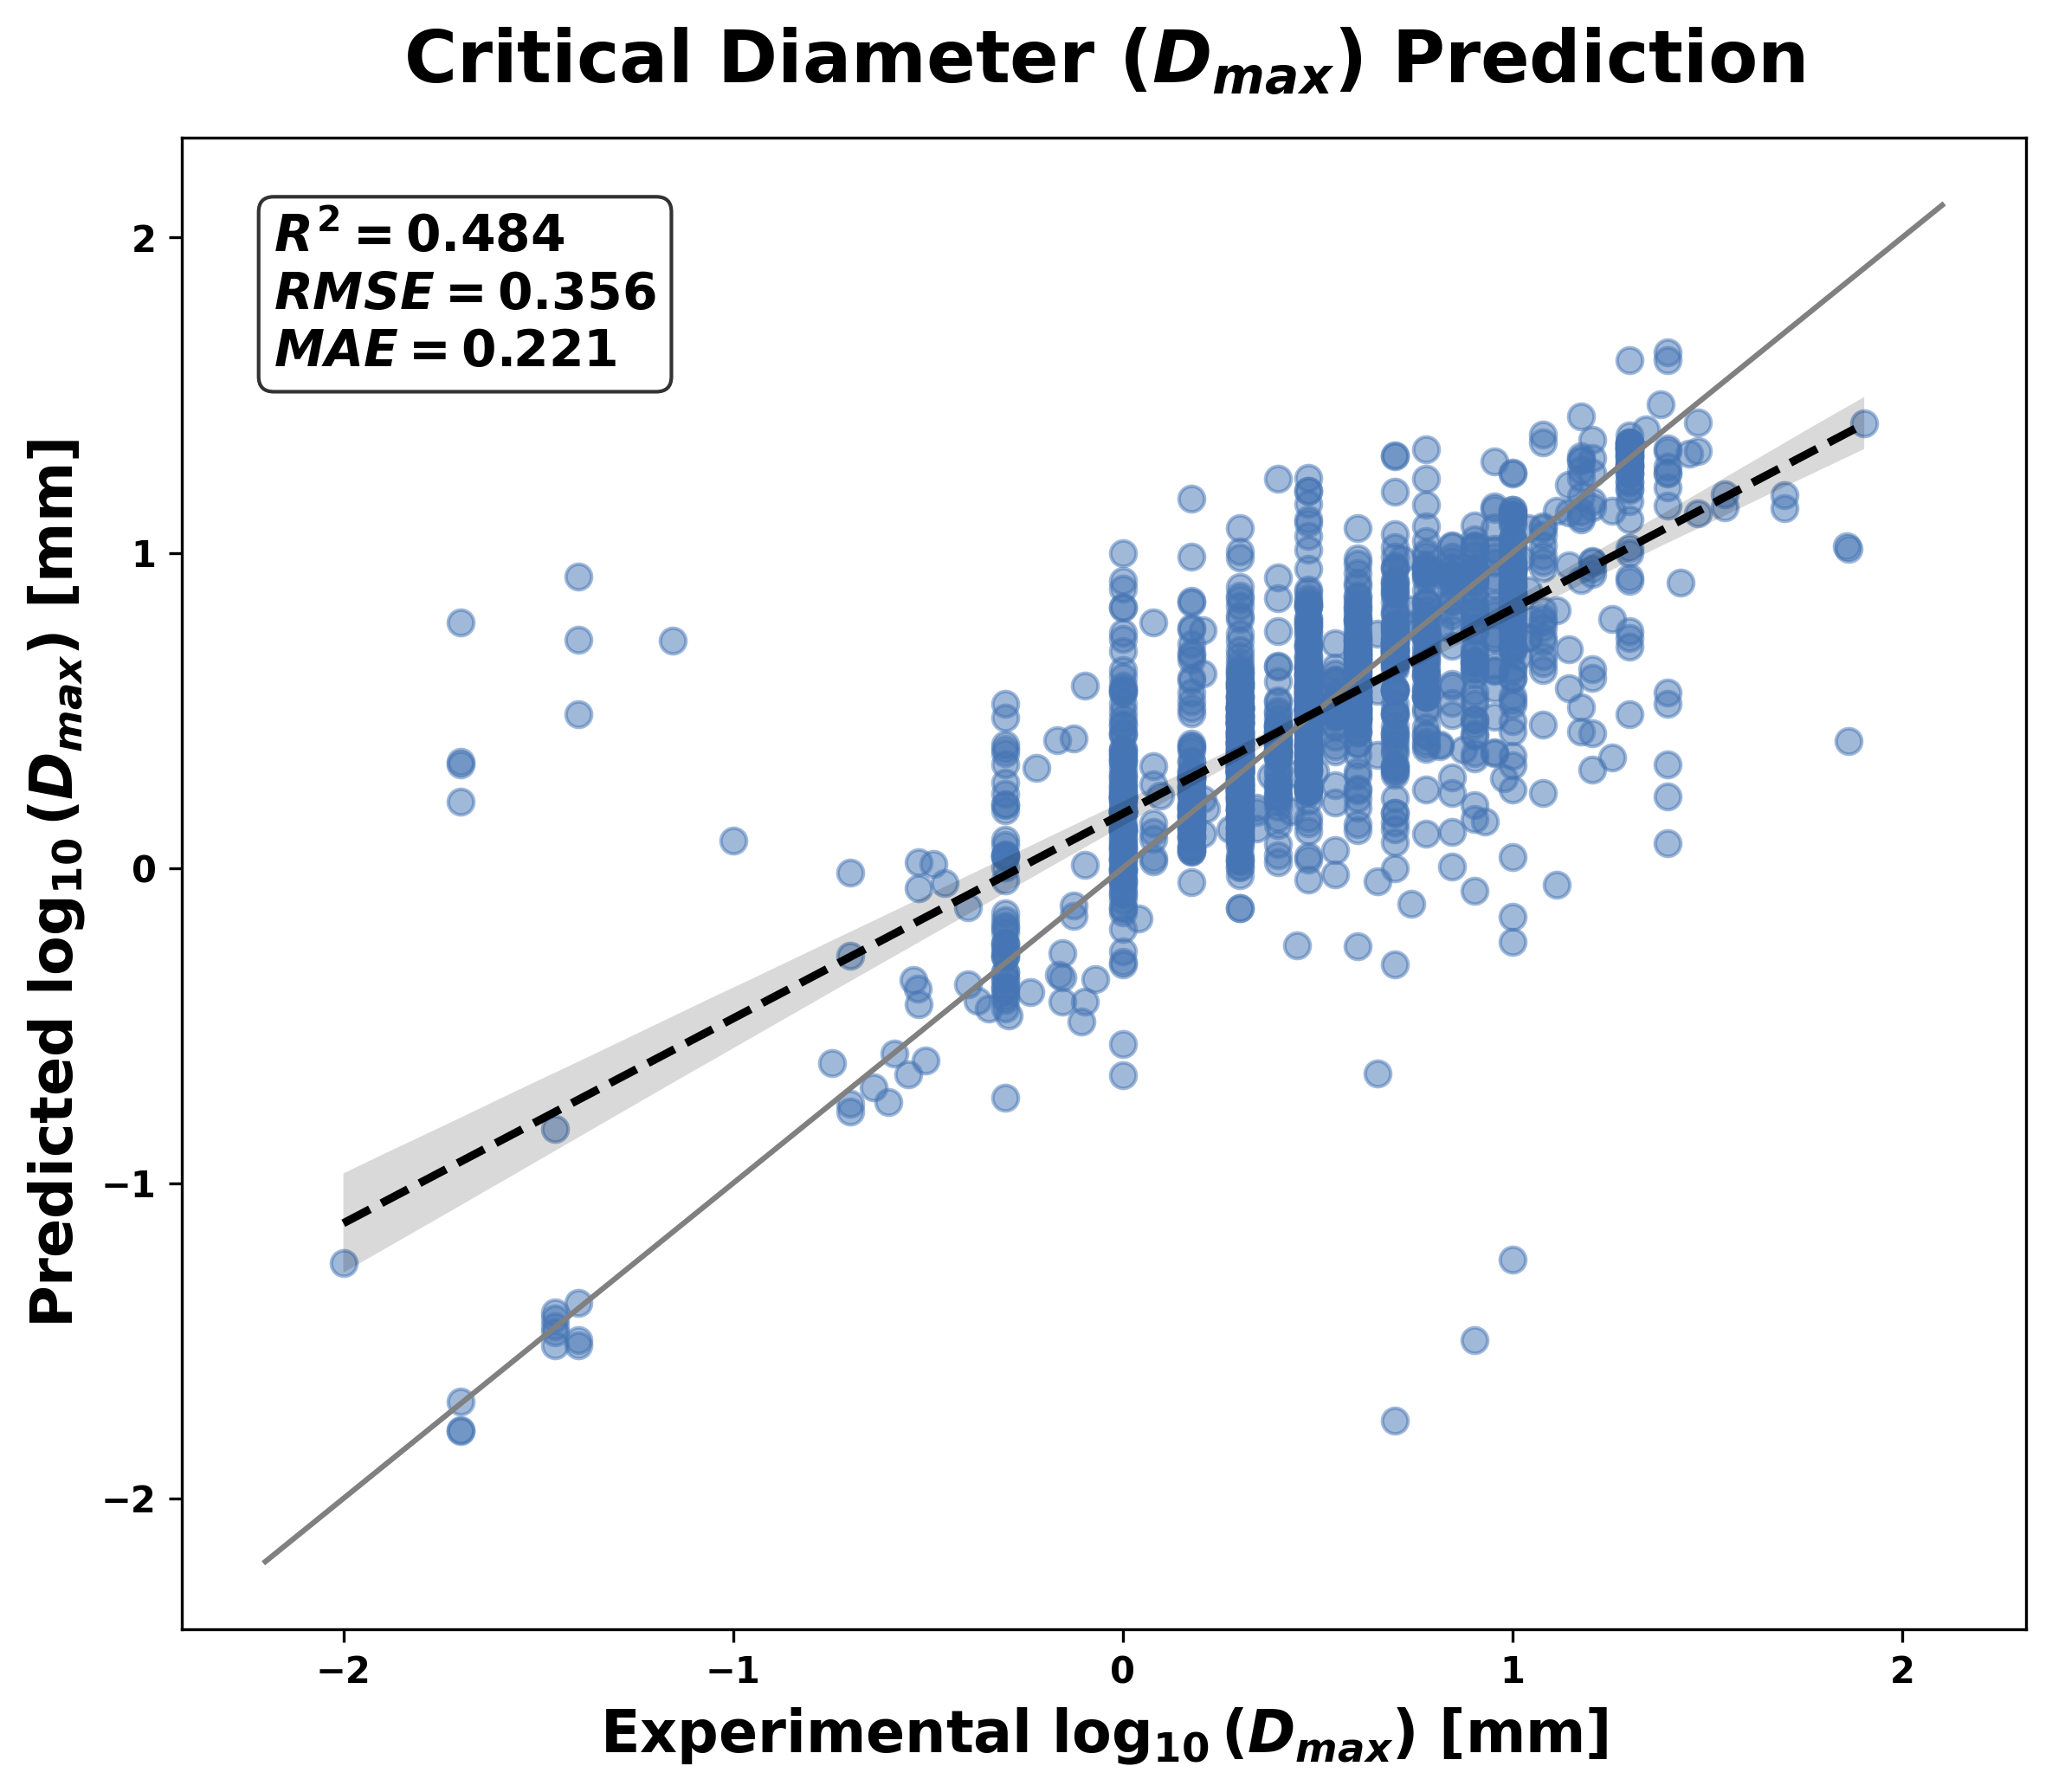


Saving all artifacts for prediction...

=== Making predictions on the entire dataset ===

=== Prediction Summary ===
Total samples predicted: 1299
Dmax: MAE (log) = 0.116, R² (log) = 0.863

Predictions saved to: STAGE4_DMAX_REGRESSOR/predictions_on_full_dataset.csv
Done - Final model saved: STAGE4_DMAX_REGRESSOR


In [27]:
from stage4_dmax import train_model
results3 = train_model()

In [28]:
from stage4_dmax import predict_new_data
predictions3 = predict_new_data("featurized_metallic_glass_stage1.csv", "predictions_dmax.csv")



=== PREDICTION MODE ===
Loading data from: featurized_metallic_glass_stage1.csv

Prediction Summary:
Total samples predicted: 2891
Dmax range: 0.01 to 154.99 mm

Predictions saved to: predictions_dmax.csv


# Rc

=== TRAINING MODE ===
--- Improved Rc Training (N=71) ---
Selecting top 12 stable features...
Completed CV Fold-Run 5/25
Completed CV Fold-Run 10/25
Completed CV Fold-Run 15/25
Completed CV Fold-Run 20/25
Completed CV Fold-Run 25/25

[FINAL ENSEMBLE RESULTS] R2: 0.5565 | MAE: 0.7217

[INFO] Parity plot saved as 'improved_rc_parity.png'


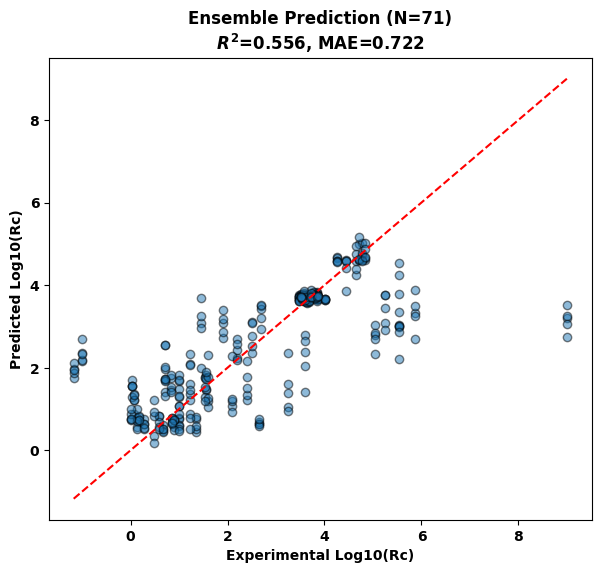


Saving all artifacts for prediction...

=== Making predictions on the entire dataset ===

=== Prediction Summary ===
Total samples predicted: 71
Rc: MAE (log) = 0.571, R² (log) = 0.756

Predictions saved to: improved_Rc_v1/predictions_on_full_dataset.csv
Done - Final model saved: improved_Rc_v1


In [29]:
from stage5_rc import train_model
results2 = train_model()

In [3]:
from stage5_rc import predict_new_data
predictions3 = predict_new_data("featurized_metallic_glass_stage1.csv", "predictions_rc.csv")



=== PREDICTION MODE ===
Loading data from: featurized_metallic_glass_stage1.csv

Prediction Summary:
Total samples predicted: 2891
Rc range: 1.87 to 220972.64

Predictions saved to: predictions_rc.csv


# Prediction Scripts

In [24]:
import os
import tempfile
import numpy as np
import pandas as pd
    
def process_alloys(input_data, output_file=None):
    """
    Process alloys from either a single alloy string or a CSV file with 'Alloys' column
    
    Parameters:
    -----------
    input_data : str or pd.DataFrame
        - Single alloy string (e.g., "Zr65Cu15Ni10Al10")
        - Path to CSV file with 'Alloys' column
        - DataFrame with 'Alloys' column
    output_file : str, optional
        Path to save results CSV file
    
    Returns:
    --------
    pd.DataFrame: DataFrame with all predictions
    """

    # Determine input type and load data
    if isinstance(input_data, str):
        if input_data.endswith('.csv'):
            # It's a CSV file path
            df = pd.read_csv(input_data)
            print(f"Loaded {len(df)} alloys from CSV file: {input_data}")
        else:
            # It's a single alloy string
            df = pd.DataFrame({"Alloys": [input_data]})
            print(f"Processing single alloy: {input_data}")
    elif isinstance(input_data, pd.DataFrame):
        # It's already a DataFrame
        df = input_data.copy()
        print(f"Processing {len(df)} alloys from DataFrame")
    else:
        raise ValueError("Input must be a string (alloy or CSV path) or a pandas DataFrame")
    
    # Check if 'Alloys' column exists
    if 'Alloys' not in df.columns:
        raise ValueError("Input data must have an 'Alloys' column")
    
    # Create a temporary directory for our files
    temp_dir = tempfile.mkdtemp()
    temp_featurized_path = os.path.join(temp_dir, "featurized.csv")
    
    # Step 1: Featurize all alloys
    print("Step 1: Featurizing alloys...")
    featurized = featurize_alloys_complete(df, formula_col="Alloys")
    featurized.to_csv(temp_featurized_path, index=False)
    
    # Step 2: Predict thermal properties FIRST (needed for phase prediction)
    print("Step 2: Predicting thermal properties...")
    thermal_predictions = predict_thermal_for_alloys(temp_featurized_path)
    
    # Step 3: Add thermal predictions to the featurized data
    featurized_with_thermal = featurized.copy()
    featurized_with_thermal["Tg"] = thermal_predictions["Predicted_Tg"]
    featurized_with_thermal["Tx"] = thermal_predictions["Predicted_Tx"]
    featurized_with_thermal["Tl"] = thermal_predictions["Predicted_Tl"]
    
    # Save the updated featurized data with thermal properties
    featurized_with_thermal.to_csv(temp_featurized_path, index=False)
    
    # Step 4: Phase classification (now with thermal properties)
    print("Step 4: Classifying phases...")
    from trained_stage2_with_predictions_flexible import predict_new_data as predict_phase
    phase_predictions = predict_phase(temp_featurized_path)
    
    # Step 5: Critical diameter prediction
    print("Step 5: Predicting critical diameter...")
    from stage4_dmax import predict_new_data as predict_dmax
    dmax_predictions = predict_dmax(temp_featurized_path)
    
    # Step 6: Cooling rate prediction
    print("Step 6: Predicting cooling rate...")
    from stage5_rc import predict_new_data as predict_rc
    rc_predictions = predict_rc(temp_featurized_path)
    
    # Step 7: Combine all results
    print("Step 7: Combining results...")
    final_results = df.copy()
    
    # Add phase predictions
    final_results["Predicted_Phase"] = phase_predictions["Predicted_Phase"]
    final_results["Phase_Confidence"] = phase_predictions["Prediction_Confidence"]
    
    # Add thermal predictions
    final_results["Predicted_Tg"] = thermal_predictions["Predicted_Tg"]
    final_results["Predicted_Tx"] = thermal_predictions["Predicted_Tx"]
    final_results["Predicted_Tl"] = thermal_predictions["Predicted_Tl"]
    
    # Add Dmax predictions
    final_results["Predicted_Dmax"] = dmax_predictions["Predicted_Dmax"]
    
    # Add Rc predictions
    final_results["Predicted_Rc"] = rc_predictions["Predicted_Rc"]
    
    # Save results if output file is specified
    if output_file:
        final_results.to_csv(output_file, index=False)
        print(f"Results saved to: {output_file}")
    
    # Clean up temporary files
    import shutil
    shutil.rmtree(temp_dir)
    
    return final_results

def featurize_alloys_complete(df, formula_col="Alloys"):
    """Complete featurization for alloys that ensures all features match training data"""
    import numpy as np
    import pandas as pd
    
    # Load the original featurized data to see what features we need
    try:
        # Try to load the original featurized data
        original_df = pd.read_csv("featurized_metallic_glass_stage1.csv")
        required_features = list(original_df.columns)
    except:
        # If we can't load the original data, we'll proceed with what we have
        required_features = None
    
    # Make a copy to avoid modifying the original
    result_df = df.copy()
    
    # Check if required column exists
    if formula_col not in result_df.columns:
        raise ValueError(f"Column '{formula_col}' not found in DataFrame")
    
    # Parse compositions
    from featurization_module import StrToComposition, MATMINER_AVAILABLE
    if MATMINER_AVAILABLE:
        result_df = StrToComposition(target_col_id="composition_obj").featurize_dataframe(
            result_df, formula_col, ignore_errors=True
        )
    else:
        result_df["composition_obj"] = None
    
    # Add matminer features
    if MATMINER_AVAILABLE:
        from featurization_module import (
            _EP_base, _ST_base, _VO_base, _IP_base
        )
        
        featurizers = []
        if _EP_base is not None:
            featurizers.append(_EP_base.from_preset("magpie"))
        if _ST_base is not None:
            featurizers.append(_ST_base())
        if _VO_base is not None:
            featurizers.append(_VO_base())
        if _IP_base is not None:
            featurizers.append(_IP_base(fast=True))
        
        for f in featurizers:
            result_df = f.featurize_dataframe(result_df, "composition_obj", ignore_errors=True)
    
    # Add custom features
    from featurization_module import compute_all_custom_features
    custom = result_df["composition_obj"].apply(compute_all_custom_features)
    result_df = pd.concat([result_df, custom], axis=1)
    
    # For single rows, skip the column dropping step
    if len(result_df) > 1:
        from featurization_module import drop_constant_or_nan_columns
        result_df, _ = drop_constant_or_nan_columns(result_df)
    
    # Drop the composition object column and original formula column
    result_df.drop(columns=["composition_obj", formula_col], inplace=True, errors="ignore")
    
    # If we have required features from the original data, ensure we have all of them
    if required_features is not None:
        # Add any missing features with NaN values
        for feature in required_features:
            if feature not in result_df.columns:
                result_df[feature] = np.nan
        
        # Reorder columns to match the original data
        # Only include columns that exist in both dataframes
        common_features = [f for f in required_features if f in result_df.columns]
        result_df = result_df[common_features]
    
    # Fill NaN values with 0 or median for numeric columns
    # This is crucial for the preprocessing pipeline
    for col in result_df.columns:
        if result_df[col].isna().any():
            # For numeric columns, fill with 0
            if pd.api.types.is_numeric_dtype(result_df[col]):
                result_df[col] = result_df[col].fillna(0)
            else:
                # For categorical columns, fill with the most frequent value
                most_frequent = result_df[col].mode()
                if not most_frequent.empty:
                    result_df[col] = result_df[col].fillna(most_frequent[0])
                else:
                    result_df[col] = result_df[col].fillna("unknown")
    
    return result_df

def predict_thermal_for_alloys(featurized_path):
    """Modified thermal prediction function for multiple alloys"""
    import os
    import joblib
    import numpy as np
    import pandas as pd
    import torch
    
    # Load the model artifacts
    from stage3_thermal_properties import STAGE1_MODEL, STAGE1_TOP, STAGE1_SCALER, GlassThermalModel, DEVICE
    
    # Load the featurized data
    df = pd.read_csv(featurized_path)
    
    # Load the trained model components
    top_features = np.load(STAGE1_TOP)
    scaler = joblib.load(STAGE1_SCALER)
    
    # Get feature columns
    feature_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.number)]
    
    # Make sure all top features exist in the dataset
    missing_features = [f for f in top_features if f not in feature_cols]
    if missing_features:
        print(f"Warning: {len(missing_features)} features are missing from the dataset")
        # Only use features that exist in both
        common_features = [f for f in top_features if f in feature_cols]
        print(f"Using {len(common_features)} common features")
        top_features = np.array(common_features)
    
    # Prepare features
    X = df[top_features].fillna(0).values
    X_scaled = scaler.transform(X)
    
    # Load model
    model = GlassThermalModel(input_dim=len(top_features))
    model.load_state_dict(torch.load(STAGE1_MODEL, map_location=DEVICE))
    model.to(DEVICE)
    model.eval()
    
    # Make predictions in batches if needed
    batch_size = 64
    predictions = []
    with torch.no_grad():
        for i in range(0, len(X_scaled), batch_size):
            batch = torch.FloatTensor(X_scaled[i:i+batch_size]).to(DEVICE)
            batch_pred = model(batch).cpu().numpy()
            predictions.append(batch_pred)
    
    predictions = np.concatenate(predictions, axis=0)
    
    # Create a DataFrame with predictions
    result_df = df.copy()
    result_df["Predicted_Tg"] = predictions[:, 0]
    result_df["Predicted_Tx"] = predictions[:, 1]
    result_df["Predicted_Tl"] = predictions[:, 2]
    
    return result_df

# Usage examples:

# 1. Process a single alloy
result = process_alloys("Fe25Co25Cr25Al25") #("Fe53.1B14.6Si30.6C1Cu0.7")
print(result[['Alloys', 'Predicted_Phase', 'Predicted_Tg', 'Predicted_Tx', 'Predicted_Tl', 'Predicted_Dmax', 'Predicted_Rc']])

# 2. Process alloys from a CSV file
result = process_alloys("your_input_data.csv", "alloy_predictions.csv")

# 3. Process alloys from a DataFrame
df = pd.DataFrame({"Alloys": ["Zr65Cu15Ni10Al10", "Cu50Zr50", "Fe80B20"]})
result = process_alloys(df)

Processing single alloy: Fe25Co25Cr25Al25
Step 1: Featurizing alloys...


StrToComposition:   0%|          | 0/1 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/1 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/1 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/1 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/1 [00:00<?, ?it/s]

Step 2: Predicting thermal properties...
Step 4: Classifying phases...

=== PREDICTION MODE ===
Loading data from: /tmp/tmp7e5wrict/featurized.csv


ValueError: Unexpected input dimension 177, expected 179

# Predictions from unified_predictor

In [2]:
from unified_predictor import *
# 1. Process a single alloy
result = process_alloys("Zr65Cu15Ni10Al10")
print(result[['Alloys', 'Predicted_Phase', 'Predicted_Tg', 'Predicted_Tx', 'Predicted_Tl', 'Predicted_Dmax', 'Predicted_Rc']])

# 2. Process alloys from a CSV file
result = process_alloys("your_input_data.csv", "alloy_predictions.csv")

# 3. Process alloys from a DataFrame
df = pd.DataFrame({"Alloys": ["Co25Fe25Mn25Ni25", "Fe25Co25Cr25Al25", "Zr65Cu15Ni10Al10"]})
result = process_alloys(df)

Processing single alloy: Zr65Cu15Ni10Al10
Step 1: Featurizing alloys...


StrToComposition:   0%|          | 0/1 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/1 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/1 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/1 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/1 [00:00<?, ?it/s]

[WARN] compute_all_custom_features failed or returned unexpected shape: Shape of passed values is (29, 1), indices imply (1, 1)
Step 2: Predicting thermal properties...
[THERMAL] Loaded 1 samples for prediction.
[THERMAL] Model expects 100 top features.
[THERMAL] Warning: 21 top features missing; adding them as zeros (examples: ['weighted_mean_atomic_number', 'weighted_mean_atomic_weight', 'weighted_std_melting_point', 'weighted_std_atomic_weight', 'weighted_std_electronegativity', 'fraction_transition_metal', 'weighted_std_atomic_number', 'VEC', 'Omega_parameter', 'Hmix_est_chi_sq'])
[THERMAL] Predictions computed. Output shape: (1, 173)
  - Predicted_Tg: mean=459.86, std=nan
  - Predicted_Tx: mean=499.02, std=nan
  - Predicted_Tl: mean=1239.91, std=nan
Step 3: Classifying phases (Stage-2). Attempting call and applying padding fallback if needed...
Trying Stage-2 prediction using mode: path

=== PREDICTION MODE ===
Loading data from: /tmp/bmg_pipe_ksct9oz4/featurized_with_thermal.csv


RuntimeError: Stage-2 prediction failed after attempts. Last exception: 'Rc_mm/s'

In [2]:
result

Alloys Predicted_Phase  Phase_Confidence  Predicted_Tg  \
0  Co25Fe25Mn25Ni25             CMA          0.997381    754.458679   
1  Fe25Co25Cr25Al25             CMA          0.997470    814.656067   
2  Zr65Cu15Ni10Al10   Metalic_Glass          0.988649    634.302124   

   Predicted_Tx  Predicted_Tl  Predicted_Dmax  Predicted_Rc  
0    802.660522   1332.943604       14.957202  72982.570789  
1    854.395447   1495.979980        6.498139    391.491909  
2    697.735657   1188.157593        9.751945      4.885020

Phase Classification Accuracy: 98.30%


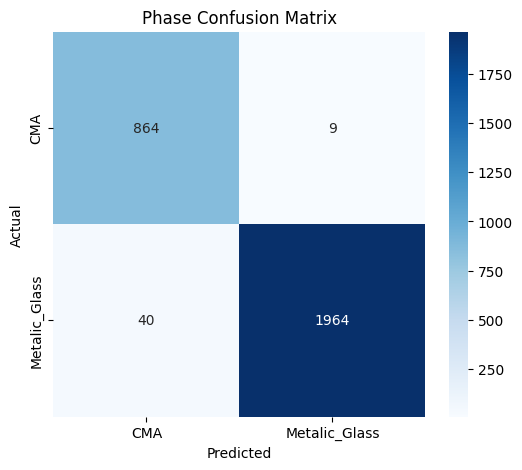

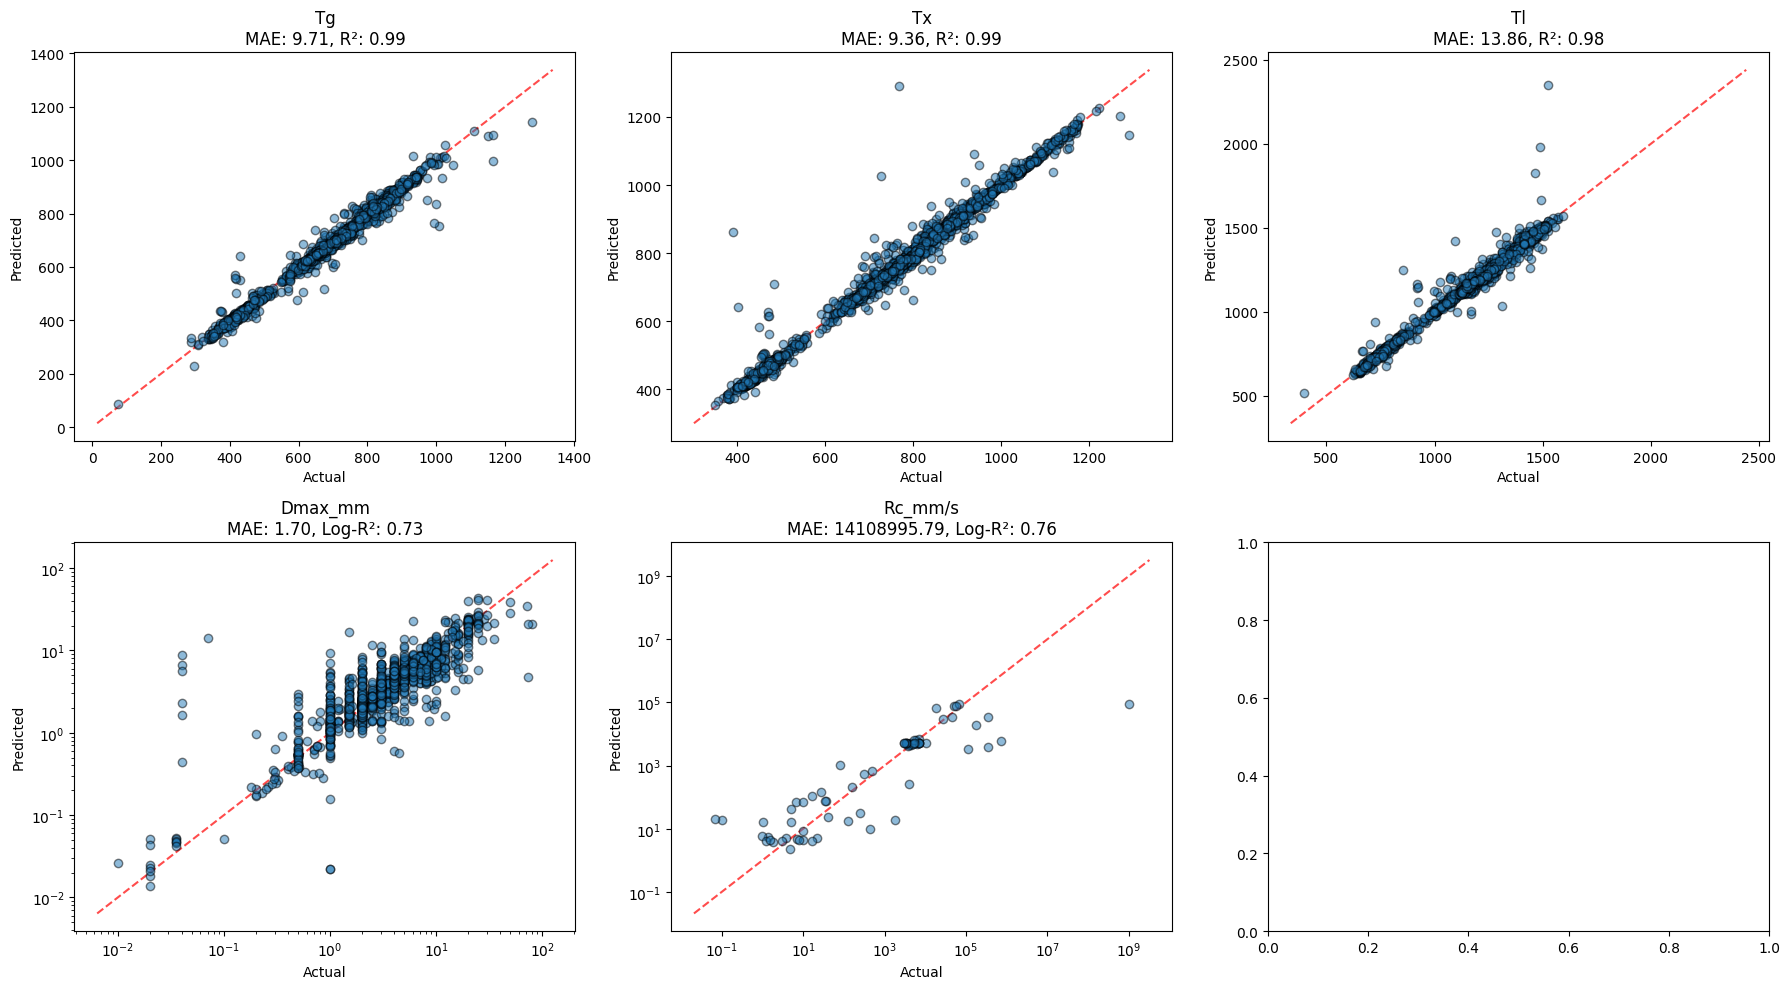

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, r2_score

# 1. LOAD AND PREPARE DATA
df = pd.read_csv('final_results.csv')

# Map ground truth labels to match the model's output classes
# (Adjust this mapping based on your specific dataset labels)
phase_mapping = {'MG': 'Metalic_Glass', 'MMG': 'Metalic_Glass', 'CMG': 'Metalic_Glass', 'CMA': 'CMA'}
df['True_Phase_Mapped'] = df['Phase'].map(phase_mapping)

# Convert strings like "NAN" to actual numeric NaNs for calculation
cols_to_fix = ['Tg', 'Tx', 'Tl', 'Dmax_mm', 'Rc_mm/s']
for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. EVALUATE PHASE (CLASSIFICATION)
mask_phase = df['True_Phase_Mapped'].notna()
y_true_p, y_pred_p = df.loc[mask_phase, 'True_Phase_Mapped'], df.loc[mask_phase, 'Predicted_Phase']

print(f"Phase Classification Accuracy: {accuracy_score(y_true_p, y_pred_p):.2%}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_true_p, y_pred_p), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_pred_p), yticklabels=np.unique(y_pred_p))
plt.title('Phase Confusion Matrix')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.show()

# 3. EVALUATE PROPERTIES (REGRESSION)
properties = [
    ('Tg', 'Predicted_Tg'), ('Tx', 'Predicted_Tx'), 
    ('Tl', 'Predicted_Tl'), ('Dmax_mm', 'Predicted_Dmax_mm'), ('Rc_mm/s', 'Predicted_Rc_Ks')
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (true_col, pred_col) in enumerate(properties):
    # Filter valid rows (where we have both experimental data and prediction)
    valid = df[[true_col, pred_col]].dropna()
    y_t, y_p = valid[true_col], valid[pred_col]
    
    # Calculate Metrics
    mae = mean_absolute_error(y_t, y_p)
    r2 = r2_score(y_t, y_p)
    
    # For Rc and Dmax, R2 is often calculated on log10 scale
    if "Rc" in true_col or "Dmax" in true_col:
        # Avoid log(0)
        log_mask = (y_t > 0) & (y_p > 0)
        r2_log = r2_score(np.log10(y_t[log_mask]), np.log10(y_p[log_mask]))
        title = f"{true_col}\nMAE: {mae:.2f}, Log-R²: {r2_log:.2f}"
    else:
        title = f"{true_col}\nMAE: {mae:.2f}, R²: {r2:.2f}"

    # Parity Plot
    ax = axes[i]
    ax.scatter(y_t, y_p, alpha=0.5, edgecolors='k')
    if "Rc" in true_col or "Dmax" in true_col: ax.set_xscale('log'); ax.set_yscale('log')
    
    lims = [min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(lims, lims, 'r--', alpha=0.7, zorder=0)
    ax.set_title(title); ax.set_xlabel('Actual'); ax.set_ylabel('Predicted')

plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the files
train_df = pd.read_csv('featurized_metallic_glass_stage1.csv')
pipeline_df = pd.read_csv('prediction_temp/your_input_data_featurized.csv')

# Identify numeric columns in both
common_cols = list(set(train_df.columns).intersection(set(pipeline_df.columns)))
numeric_cols = [c for c in common_cols if pd.api.types.is_numeric_dtype(train_df[c]) and pd.api.types.is_numeric_dtype(pipeline_df[c])]

results = []

for col in numeric_cols:
    # Get values, drop NaNs if they exist in either to compute a valid R2
    # Though both files should have same structure
    y_true = train_df[col]
    y_pred = pipeline_df[col]
    
    # Filter for non-NaN indices
    mask = y_true.notna() & y_pred.notna()
    if mask.sum() < 2:
        # Not enough data to compute R2 or constant
        continue
        
    y_t = y_true[mask]
    y_p = y_pred[mask]
    
    # Check if y_t is constant (r2_score is undefined for constant targets)
    if y_t.std() == 0:
        if (y_t - y_p).abs().max() < 1e-5:
            r2 = 1.0
        else:
            r2 = 0.0 # They differ but it's constant
    else:
        try:
            r2 = r2_score(y_t, y_p)
        except:
            r2 = np.nan
            
    results.append({'feature': col, 'r2': r2})

# Convert to DataFrame
r2_df = pd.DataFrame(results)

# Filter for R2 < 0.99
low_r2 = r2_df[r2_df['r2'] < 0.99].sort_values(by='r2')

print(f"Total numeric features analyzed: {len(numeric_cols)}")
print(f"Features with R2 < 0.99: {len(low_r2)}")

if not low_r2.empty:
    print("\nFeatures with R2 < 0.99:")
    print(low_r2.to_string(index=False))
else:
    print("\nNo features found with R2 < 0.99.")

# Identify features that were potentially problematic (NaN R2)
problematic = r2_df[r2_df['r2'].isna()]
if not problematic.empty:
    print("\nFeatures where R2 could not be calculated (likely constant or too many NaNs):")
    print(problematic['feature'].tolist())

Total numeric features analyzed: 175
Features with R2 < 0.99: 1

Features with R2 < 0.99:
 feature       r2
delta_Tx 0.906309


In [3]:
import os
import torch
import joblib
import numpy as np
import pandas as pd
from typing import List

# Import directly from your uploaded files to ensure architecture matches
import featurization_module as feat_mod
import stage3_thermal_properties as s3_mod
import stage4_dmax as s4_mod
import stage5_rc as s5_mod
import trained_stage2_with_predictions_flexible as s2_mod

class BMGUnifiedPredictor:
    def __init__(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
        # Updated paths based on your Stage script defaults
        self.paths = {
            "s3_model": os.path.join(s3_mod.OUTPUT_DIR, "stage1_regression_model.pth"),
            "s3_feats": os.path.join(s3_mod.OUTPUT_DIR, "stage1_top_features.npy"),
            "s3_scaler": os.path.join(s3_mod.OUTPUT_DIR, "stage1_scaler.joblib"),
            
            "s4_model": s4_mod.DMAX_MODEL,
            "s4_feats": s4_mod.DMAX_FEATURES,
            "s4_scaler": s4_mod.DMAX_SCALER,
            
            "s5_model": os.path.join(s5_mod.OUT_DIR, "rc_model.pth"),
            "s5_feats": os.path.join(s5_mod.OUT_DIR, "rc_features.npy"),
            "s5_scaler": os.path.join(s5_mod.OUT_DIR, "rc_scaler.joblib")
        }

    def _prepare_input(self, df, feat_path, scaler_path):
        """Aligns features and scales them exactly as expected by the model."""
        if not os.path.exists(feat_path):
            raise FileNotFoundError(f"Missing feature list: {feat_path}")
            
        required_features = np.load(feat_path, allow_pickle=True).tolist()
        scaler = joblib.load(scaler_path)
        
        # Add missing columns as zeros, then reorder
        df_temp = df.copy()
        for col in required_features:
            if col not in df_temp.columns:
                df_temp[col] = 0.0
        
        X = df_temp[required_features].values.astype(np.float32)
        return scaler.transform(X), required_features

    def predict(self, input_csv, output_file="unified_results.csv"):
        print("--- Step 1: Featurizing Alloys ---")
        df_raw = pd.read_csv(input_csv)
        # Use your featurization module
        df_feat = feat_mod.featurize_alloys(df_raw)

        print("--- Step 2: Predicting Thermal Properties (Tg, Tx, Tl) ---")
        X_s3, _ = self._prepare_input(df_feat, self.paths["s3_feats"], self.paths["s3_scaler"])
        model_s3 = s3_mod.GlassThermalModel(input_dim=X_s3.shape[1]).to(self.device)
        model_s3.load_state_dict(torch.load(self.paths["s3_model"], map_location=self.device))
        model_s3.eval()
        
        with torch.no_grad():
            t_preds = model_s3(torch.FloatTensor(X_s3).to(self.device)).cpu().numpy()
        
        df_feat['Tg'], df_feat['Tx'], df_feat['Tl'] = t_preds[:, 0], t_preds[:, 1], t_preds[:, 2]
        
        # Calculate derived thermal features needed for Dmax/Rc/Phase
        df_feat['delta_Tx'] = df_feat['Tx'] - df_feat['Tg']
        df_feat['Trg'] = df_feat['Tg'] / df_feat['Tl']
        df_feat['gamma'] = df_feat['Tx'] / (df_feat['Tg'] + df_feat['Tl'])

        print("--- Step 3: Predicting Phase ---")
        # Save temp file because Stage 2 script is designed to read from CSV
        temp_path = "temp_feat_for_phase.csv"
        df_feat.to_csv(temp_path, index=False)
        phase_results = s2_mod.predict_new_data(temp_path)
        df_feat['Predicted_Phase'] = phase_results['Predicted_Phase'].values

        print("--- Step 4: Predicting Dmax ---")
        X_s4, _ = self._prepare_input(df_feat, self.paths["s4_feats"], self.paths["s4_scaler"])
        model_s4 = s4_mod.DmaxResidualNet(input_dim=X_s4.shape[1]).to(self.device)
        model_s4.load_state_dict(torch.load(self.paths["s4_model"], map_location=self.device))
        model_s4.eval()
        with torch.no_grad():
            # Model outputs log10(Dmax), so we convert back
            df_feat['Predicted_Dmax_mm'] = 10**model_s4(torch.FloatTensor(X_s4).to(self.device)).cpu().numpy()

        print("--- Step 5: Predicting Rc ---")
        X_s5, _ = self._prepare_input(df_feat, self.paths["s5_feats"], self.paths["s5_scaler"])
        model_s5 = s5_mod.RobustMLP(input_dim=X_s5.shape[1]).to(self.device)
        model_s5.load_state_dict(torch.load(self.paths["s5_model"], map_location=self.device))
        model_s5.eval()
        with torch.no_grad():
            # Model outputs log10(Rc), so we convert back
            df_feat['Predicted_Rc_Ks'] = 10**model_s5(torch.FloatTensor(X_s5).to(self.device)).cpu().numpy()

        # Clean up and save
        final_cols = ['Alloys', 'Tg', 'Tx', 'Tl', 'Predicted_Phase', 'Predicted_Dmax_mm', 'Predicted_Rc_Ks']
        df_feat[final_cols].to_csv(output_file, index=False)
        if os.path.exists(temp_path): os.remove(temp_path)
        print(f"Done! Results saved to {output_file}")
        return df_feat[final_cols]

if __name__ == "__main__":
    # Ensure you have your input CSV ready
    predictor = BMGUnifiedPredictor()
    results = predictor.predict("your_input_data.csv")
    print(results.head())


--- Step 1: Featurizing Alloys ---

========== STAGE-1 FEATURIZATION ==========
Input DataFrame shape: (2891, 7)

--- NaN Report: Thermal features ---
Tg                                  :   2768/2891  ( 95.7%)
Tx                                  :   2730/2891  ( 94.4%)
Tl                                  :   2468/2891  ( 85.4%)
gamma                               :   2413/2891  ( 83.5%)
Trg                                 :   2447/2891  ( 84.6%)
delta_Tx                            :   2697/2891  ( 93.3%)
------------------------------------------------------------
Parsing alloy compositions using matminer...


StrToComposition:   0%|          | 0/2891 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/2891 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/2891 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/2891 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/2891 [00:00<?, ?it/s]

Matminer features added. Total columns now: 160
Computing custom physics features...

--- NaN Report: Custom physics features ---
mixing_entropy_J_per_molK           :   2891/2891  (100.0%)
VEC                                 :   2891/2891  (100.0%)
num_elements                        :   2891/2891  (100.0%)
max_elem_fraction                   :   2891/2891  (100.0%)
min_elem_fraction                   :   2891/2891  (100.0%)
weighted_mean_atomic_number         :   2891/2891  (100.0%)
weighted_std_atomic_number          :   2891/2891  (100.0%)
weighted_mean_atomic_weight         :   2891/2891  (100.0%)
weighted_std_atomic_weight          :   2891/2891  (100.0%)
weighted_mean_electronegativity     :   2891/2891  (100.0%)
weighted_std_electronegativity      :   2891/2891  (100.0%)
atomic_size_mismatch_delta          :   2891/2891  (100.0%)
weighted_mean_atomic_radius         :   2891/2891  (100.0%)
weighted_std_atomic_radius          :   2891/2891  (100.0%)
weighted_range_atomic_radius  

FileNotFoundError: Missing feature list: STAGE4_DMAX_REGRESSOR/dmax_features.npy

In [34]:
# Authored by: Sachin Poudel, Silesian University, Poland
import os
import tempfile
import shutil
import re
from typing import Optional, Union

import numpy as np
import pandas as pd

# Your existing modules (these must be importable from your environment)
import featurization_module as feat_mod
import stage3_thermal_properties as s3_mod
import stage4_dmax as s4_mod
import stage5_rc as s5_mod
import trained_stage2_with_predictions_flexible as s2_mod


def featurize_alloys_complete(df, formula_col="Alloys"):
    """
    Complete featurization for alloys that ensures all features match training data.
    This is the conservative fallback to use when the fast featurizer removes all columns
    (e.g., because a single-row had all-constant values dropped).
    """
    import numpy as np
    import pandas as pd

    # Try to load a canonical featurized header to preserve expected columns if available
    try:
        original_df = pd.read_csv("featurized_metallic_glass_stage1.csv")
        required_features = list(original_df.columns)
    except Exception:
        required_features = None

    result_df = df.copy()

    if formula_col not in result_df.columns:
        raise ValueError(f"Column '{formula_col}' not found in DataFrame")

    # Use StrToComposition if available to create composition objects
    try:
        from featurization_module import StrToComposition, MATMINER_AVAILABLE
    except Exception:
        StrToComposition = None
        MATMINER_AVAILABLE = False

    if MATMINER_AVAILABLE and StrToComposition is not None:
        result_df = StrToComposition(target_col_id="composition_obj").featurize_dataframe(
            result_df, formula_col, ignore_errors=True
        )
    else:
        result_df["composition_obj"] = None

    # Add matminer-like features if provided by your featurization_module
    if MATMINER_AVAILABLE:
        try:
            from featurization_module import (_EP_base, _ST_base, _VO_base, _IP_base)
            featurizers = []
            if _EP_base is not None:
                featurizers.append(_EP_base.from_preset("magpie"))
            if _ST_base is not None:
                featurizers.append(_ST_base())
            if _VO_base is not None:
                featurizers.append(_VO_base())
            if _IP_base is not None:
                featurizers.append(_IP_base(fast=True))
            for f in featurizers:
                result_df = f.featurize_dataframe(result_df, "composition_obj", ignore_errors=True)
        except Exception:
            pass

    # Add custom computed features from your featurization module
    try:
        from featurization_module import compute_all_custom_features
        custom = result_df["composition_obj"].apply(compute_all_custom_features)
        result_df = pd.concat([result_df, custom], axis=1)
    except Exception:
        # If compute_all_custom_features not available or fails, continue
        pass

    # For single rows, avoid aggressive dropping of constant columns
    if len(result_df) > 1:
        try:
            from featurization_module import drop_constant_or_nan_columns
            result_df, _ = drop_constant_or_nan_columns(result_df)
        except Exception:
            pass

    # Drop helper columns
    result_df.drop(columns=["composition_obj", formula_col], inplace=True, errors="ignore")

    # If we have a required feature list, ensure columns exist (fill with NaN)
    if required_features is not None:
        for feature in required_features:
            if feature not in result_df.columns:
                result_df[feature] = np.nan
        # keep ordering to match original (but only columns present)
        common_features = [f for f in required_features if f in result_df.columns]
        result_df = result_df[common_features]

    # Fill NaNs sensibly: numeric -> 0, categorical -> mode or 'unknown'
    for col in result_df.columns:
        if result_df[col].isna().any():
            if pd.api.types.is_numeric_dtype(result_df[col]):
                result_df[col] = result_df[col].fillna(0)
            else:
                most_frequent = result_df[col].mode()
                if not most_frequent.empty:
                    result_df[col] = result_df[col].fillna(most_frequent[0])
                else:
                    result_df[col] = result_df[col].fillna("unknown")

    return result_df


class ModularBMGPipeline:
    """
    Modular pipeline that supports:
     - CSV path input (with 'Alloys' column)
     - pandas.DataFrame input (with 'Alloys' column)
     - single-alloy string input (e.g., "Zr65Cu15Ni10Al10")
    """
    def __init__(self, temp_dir: Optional[str] = None):
        self.temp_dir = temp_dir or tempfile.mkdtemp(prefix="bmg_pipe_")
        os.makedirs(self.temp_dir, exist_ok=True)

    def _prepare_input_df(self, input_data: Union[str, pd.DataFrame]) -> pd.DataFrame:
        """Normalize input to a DataFrame with 'Alloys' column."""
        if isinstance(input_data, pd.DataFrame):
            df = input_data.copy()
        elif isinstance(input_data, str):
            if os.path.exists(input_data) and input_data.lower().endswith(".csv"):
                df = pd.read_csv(input_data)
            else:
                df = pd.DataFrame({"Alloys": [input_data]})
        else:
            raise ValueError("Input must be a CSV path, a pandas DataFrame, or a single alloy string")

        if 'Alloys' not in df.columns:
            raise ValueError("Input data must contain an 'Alloys' column (or be a single alloy string)")

        df['Alloys'] = df['Alloys'].astype(str).reset_index(drop=True)
        return df

    def run_pipeline(self, input_data: Union[str, pd.DataFrame], output_csv: Optional[str] = "final_results.csv"):
        """
        Run full pipeline. If output_csv is None, returns final DataFrame instead of writing.
        """
        print(f"--- Starting pipeline ---")
        df_input = self._prepare_input_df(input_data)
        print(f"Input rows: {len(df_input)}")

        df_result = df_input.copy()

        # ---------------------
        # Step 1: Featurize
        # ---------------------
        print("Step 1: Featurizing compositions...")
        try:
            df_feats = feat_mod.featurize_alloys(df_input)
        except Exception as e_feat:
            print(f"[WARN] Primary featurizer failed: {e_feat!s}")
            df_feats = pd.DataFrame(index=range(len(df_input)))

        df_feats = df_feats.reset_index(drop=True)

        # If featurizer produced ZERO columns, try conservative fallback
        if df_feats.shape[1] == 0:
            print("[WARN] Featurizer returned 0 columns. Trying conservative fallback...")
            try:
                df_feats = featurize_alloys_complete(df_input, formula_col="Alloys").reset_index(drop=True)
                print(f"[INFO] Fallback featurizer returned shape: {df_feats.shape}")
            except Exception as e_fallback:
                print(f"[WARN] Fallback featurizer failed: {e_fallback!s}")

        # If still no columns, add a dummy numeric column to avoid EmptyDataError on CSV read
        if df_feats.shape[1] == 0:
            print("[WARN] No features available after fallback. Adding dummy '__featurizer_dummy__' = 0")
            df_feats = df_feats.copy()
            df_feats["__featurizer_dummy__"] = 0.0

        # Helpful debug info
        print("Featurized columns:", list(df_feats.columns))
        temp_feat_path = os.path.join(self.temp_dir, "step1_feats.csv")
        df_feats.to_csv(temp_feat_path, index=False)

        # ---------------------
        # Step 2: Stage-3 thermal predictions
        # ---------------------
        print("Step 2: Predicting Thermal Properties (Tg, Tx, Tl)...")

        # Try calling with path, then with DataFrame, then fallback to NaNs
        try:
            thermal_results = s3_mod.predict_new_data(temp_feat_path)
            print("[INFO] Stage-3 predictions produced via file path.")
        except Exception as e_stage3_path:
            print(f"[WARN] stage3.predict_new_data(path) failed: {e_stage3_path!s}")
            try:
                thermal_results = s3_mod.predict_new_data(df_feats)
                print("[INFO] Stage-3 predictions produced via DataFrame input (fallback).")
            except Exception as e_stage3_df:
                print(f"[WARN] stage3.predict_new_data(DataFrame) failed: {e_stage3_df!s}")
                # fallback: create NaN predictions
                n = len(df_feats)
                thermal_results = pd.DataFrame({
                    "Predicted_Tg": [np.nan] * n,
                    "Predicted_Tx": [np.nan] * n,
                    "Predicted_Tl": [np.nan] * n
                })
                print("[ERROR] stage3 unavailable — thermal predictions filled with NaN to continue pipeline.")

        df_thermal = thermal_results.copy().reset_index(drop=True)

        # Normalize predicted columns (support raw names too)
        for col in ['Tg', 'Tx', 'Tl']:
            pred_col = f'Predicted_{col}'
            if pred_col not in df_thermal.columns and col in df_thermal.columns:
                df_thermal[pred_col] = df_thermal[col].values
            if pred_col not in df_thermal.columns:
                # create column of NaNs with correct length
                df_thermal[pred_col] = np.nan

        # Attach predicted thermal columns to df_result with broadcasting safety
        for col in ['Predicted_Tg', 'Predicted_Tx', 'Predicted_Tl']:
            vals = df_thermal.get(col, pd.Series([np.nan] * len(df_thermal))).values
            if len(vals) == len(df_result):
                df_result[col] = vals
            elif len(vals) == 1 and len(df_result) > 1:
                df_result[col] = np.repeat(vals, len(df_result))
            else:
                # If shape mismatch for single-row input, try to broadcast
                df_result[col] = np.nan

        # ---------------------
        # Step 3: Thermodynamic indicators
        # ---------------------
        print("Step 3: Calculating thermodynamic indicators...")
        pred_tg = df_result.get('Predicted_Tg', pd.Series([np.nan] * len(df_result))).values.astype(float)
        pred_tx = df_result.get('Predicted_Tx', pd.Series([np.nan] * len(df_result))).values.astype(float)
        pred_tl = df_result.get('Predicted_Tl', pd.Series([np.nan] * len(df_result))).values.astype(float)

        delta_tx = np.where(np.isnan(pred_tx) | np.isnan(pred_tg), np.nan, pred_tx - pred_tg)
        trg = np.where((~np.isnan(pred_tl)) & (pred_tl != 0), pred_tg / pred_tl, np.nan)
        denom = pred_tg + pred_tl
        gamma = np.where((~np.isnan(denom)) & (denom != 0), pred_tx / denom, np.nan)

        df_result['delta_Tx'] = delta_tx
        df_result['Trg'] = trg
        df_result['gamma'] = gamma

        # ---------------------
        # Step 4: Prepare Stage-2 input
        # ---------------------
        print("Step 4: Preparing Stage-2 input...")
        df_stage2 = df_feats.copy().reset_index(drop=True)

        # Add thermal properties to stage2 input (align lengths)
        df_stage2['Tg'] = pred_tg
        df_stage2['Tx'] = pred_tx
        df_stage2['Tl'] = pred_tl
        df_stage2['delta_Tx'] = delta_tx
        df_stage2['Trg'] = trg
        df_stage2['gamma'] = gamma

        # Align to Stage-2 expected features if present in module
        want_cols = None
        for attr in ['EXPECTED_FEATURES', 'FEATURE_LIST', 'REQUIRED_COLUMNS', 'TOP_FEATURES', 'FEATURES_ORDER']:
            if hasattr(s2_mod, attr):
                val = getattr(s2_mod, attr)
                if isinstance(val, (list, tuple, np.ndarray)):
                    want_cols = [str(x) for x in val]
                elif isinstance(val, str) and os.path.exists(val):
                    try:
                        if val.endswith('.npy'):
                            want_cols = [str(x) for x in np.load(val)]
                        else:
                            want_cols = pd.read_csv(val).columns.tolist()
                    except Exception:
                        want_cols = None
                if want_cols is not None:
                    break

        if want_cols is not None:
            missing = [c for c in want_cols if c not in df_stage2.columns]
            if missing:
                print(f"[WARN] Stage-2 expected list exists; adding {len(missing)} missing columns as zeros")
                for c in missing:
                    df_stage2[c] = 0.0
            df_stage2 = df_stage2.reindex(columns=want_cols)
            print(f"[INFO] df_stage2 aligned to Stage-2 expected list. Shape: {df_stage2.shape}")

        temp_stage2_path = os.path.join(self.temp_dir, "step3_for_stage2.csv")
        df_stage2.to_csv(temp_stage2_path, index=False)

        # ---------------------
        # Step 5: Stage-2 Phase prediction
        # ---------------------
        print("Step 5: Predicting Phase (Stage-2)...")
        try:
            phase_results = s2_mod.predict_new_data(temp_stage2_path)
        except Exception as e_path:
            msg = str(e_path)
            m = re.search(r"expected\s+(\d+)", msg)
            if m:
                expected = int(m.group(1))
                current = df_stage2.shape[1]
                print(f"[Stage-2] Error indicates expected columns = {expected}, current = {current}.")
                if current > expected:
                    trimmed = df_stage2.copy()
                    removed = []
                    cols_order = list(trimmed.columns)
                    for col in reversed(cols_order):
                        if trimmed.shape[1] <= expected:
                            break
                        trimmed.drop(columns=[col], inplace=True)
                        removed.append(col)
                    print(f"[Stage-2] Trimmed {len(removed)} columns to match expected count")
                    trimmed.to_csv(temp_stage2_path, index=False)
                    try:
                        phase_results = s2_mod.predict_new_data(temp_stage2_path)
                    except Exception as e_retry:
                        try:
                            phase_results = s2_mod.predict_new_data(trimmed)
                        except Exception as e_df:
                            raise RuntimeError(f"Stage-2 failed after trimming. Last error: {e_df}") from e_df
                else:
                    raise RuntimeError(f"Stage-2 error when calling with {df_stage2.shape[1]} cols: {e_path}") from e_path
            else:
                try:
                    phase_results = s2_mod.predict_new_data(df_stage2)
                except Exception as e_df:
                    raise RuntimeError(f"Stage-2 failed for both path and DataFrame calls. Path error: {e_path}; DF error: {e_df}") from e_df

        if phase_results is None:
            raise RuntimeError("Stage-2 did not return predictions")

        # Add phase predictions robustly
        if 'Predicted_Phase' in phase_results.columns:
            df_result['Predicted_Phase'] = phase_results['Predicted_Phase'].values
        elif 'Phase' in phase_results.columns:
            df_result['Predicted_Phase'] = phase_results['Phase'].values
        else:
            for cand in ['predicted_phase', 'pred_phase', 'phase_pred']:
                if cand in phase_results.columns:
                    df_result['Predicted_Phase'] = phase_results[cand].values
                    break

        for conf_name in ['Phase_Confidence', 'Prediction_Confidence', 'pred_confidence', 'confidence']:
            if conf_name in phase_results.columns:
                df_result['Phase_Confidence'] = phase_results[conf_name].values
                break

        # ---------------------
        # Step 6: Stage-4 Dmax
        # ---------------------
        print("Step 6: Predicting Dmax (Stage-4)...")
        df_for_stage4 = df_feats.copy()
        df_for_stage4['Tg'] = pred_tg
        df_for_stage4['Tx'] = pred_tx
        df_for_stage4['Tl'] = pred_tl
        df_for_stage4['delta_Tx'] = delta_tx
        df_for_stage4['Trg'] = trg
        df_for_stage4['gamma'] = gamma

        try:
            dmax_results = s4_mod.predict_new_data(df_for_stage4)
        except TypeError:
            tmp4 = os.path.join(self.temp_dir, "step3_for_stage4.csv")
            df_for_stage4.to_csv(tmp4, index=False)
            dmax_results = s4_mod.predict_new_data(tmp4)

        if 'Predicted_Dmax' in dmax_results.columns:
            df_result['Predicted_Dmax_mm'] = dmax_results['Predicted_Dmax'].values
        elif 'Predicted_Dmax_mm' in dmax_results.columns:
            df_result['Predicted_Dmax_mm'] = dmax_results['Predicted_Dmax_mm'].values

        # ---------------------
        # Step 7: Stage-5 Rc
        # ---------------------
        print("Step 7: Predicting Rc (Stage-5)...")
        df_for_stage5 = df_for_stage4.copy()
        tmp5 = os.path.join(self.temp_dir, "step3_for_stage5.csv")
        df_for_stage5.to_csv(tmp5, index=False)
        rc_results = s5_mod.predict_new_data(tmp5)

        if 'Predicted_Rc' in rc_results.columns:
            df_result['Predicted_Rc_Ks'] = rc_results['Predicted_Rc'].values
        elif 'Predicted_Rc_Ks' in rc_results.columns:
            df_result['Predicted_Rc_Ks'] = rc_results['Predicted_Rc_Ks'].values

        df_result['Alloys'] = df_result['Alloys'].astype(str)

        # FINAL export or return
        if output_csv:
            df_result.to_csv(output_csv, index=False)
            print(f"\nSUCCESS: Final results saved to {output_csv}")
        else:
            print("\nSUCCESS: Final results prepared (not written to disk). Returning DataFrame.")
            self._cleanup()
            return df_result

        self._cleanup()
        return df_result

    def _cleanup(self):
        try:
            if os.path.isdir(self.temp_dir):
                for name in os.listdir(self.temp_dir):
                    path = os.path.join(self.temp_dir, name)
                    try:
                        if os.path.isfile(path) or os.path.islink(path):
                            os.remove(path)
                        elif os.path.isdir(path):
                            shutil.rmtree(path, ignore_errors=True)
                    except Exception:
                        pass
                try:
                    os.rmdir(self.temp_dir)
                except Exception:
                    pass
        except Exception:
            pass


# Convenience wrapper
def predict_single_alloy(alloy_formula: str, out_csv: Optional[str] = None):
    pipeline = ModularBMGPipeline()
    return pipeline.run_pipeline(alloy_formula, output_csv=out_csv)


if __name__ == "__main__":
    # Example usage:
    # 1) Single alloy, return DataFrame (no file written)
    pipeline = ModularBMGPipeline()
    df_out = pipeline.run_pipeline("Zr65Cu15Ni10Al10", output_csv=None)
    print(df_out)

    # 2) CSV input (writes 'final_results.csv')
    # pipeline.run_pipeline("your_input_data.csv", "final_results.csv")


--- Starting pipeline ---
Input rows: 1
Step 1: Featurizing compositions...

========== STAGE-1 FEATURIZATION ==========
Input DataFrame shape: (1, 1)
Parsing alloy compositions using matminer...


StrToComposition:   0%|          | 0/1 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/1 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/1 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/1 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/1 [00:00<?, ?it/s]

Matminer features added. Total columns now: 151
Computing custom physics features...

--- NaN Report: Custom physics features ---
mixing_entropy_J_per_molK           :      1/1  (100.0%)
VEC                                 :      1/1  (100.0%)
num_elements                        :      1/1  (100.0%)
max_elem_fraction                   :      1/1  (100.0%)
min_elem_fraction                   :      1/1  (100.0%)
weighted_mean_atomic_number         :      1/1  (100.0%)
weighted_std_atomic_number          :      1/1  (100.0%)
weighted_mean_atomic_weight         :      1/1  (100.0%)
weighted_std_atomic_weight          :      1/1  (100.0%)
weighted_mean_electronegativity     :      1/1  (100.0%)
weighted_std_electronegativity      :      1/1  (100.0%)
atomic_size_mismatch_delta          :      1/1  (100.0%)
weighted_mean_atomic_radius         :      1/1  (100.0%)
weighted_std_atomic_radius          :      1/1  (100.0%)
weighted_range_atomic_radius        :      1/1  (100.0%)
weighted_mean_c

StrToComposition:   0%|          | 0/1 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/1 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/1 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/1 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/1 [00:00<?, ?it/s]

[INFO] Fallback featurizer returned shape: (1, 178)
Featurized columns: ['Phase', 'Tg', 'Tx', 'Tl', 'Rc_mm/s', 'Dmax_mm', 'gamma', 'Trg', 'delta_Tx', 'MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range Number', 'MagpieData mean Number', 'MagpieData avg_dev Number', 'MagpieData mode Number', 'MagpieData minimum MendeleevNumber', 'MagpieData maximum MendeleevNumber', 'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber', 'MagpieData avg_dev MendeleevNumber', 'MagpieData mode MendeleevNumber', 'MagpieData minimum AtomicWeight', 'MagpieData maximum AtomicWeight', 'MagpieData range AtomicWeight', 'MagpieData mean AtomicWeight', 'MagpieData avg_dev AtomicWeight', 'MagpieData mode AtomicWeight', 'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT', 'MagpieData range MeltingT', 'MagpieData mean MeltingT', 'MagpieData avg_dev MeltingT', 'MagpieData mode MeltingT', 'MagpieData minimum Column', 'MagpieData maximum Column', 'MagpieData range Column',

In [35]:
if __name__ == "__main__":
    # Example usage:
    # 1) Single alloy, return DataFrame (no file written)
    pipeline = ModularBMGPipeline()
    # df_out = pipeline.run_pipeline("Zr65Cu15Ni10Al10", output_csv=None)
    # print(df_out)

    # 2) CSV input (writes 'final_results.csv')
    pipeline.run_pipeline("your_input_data.csv", "final_results.csv")

--- Starting pipeline ---
Input rows: 2891
Step 1: Featurizing compositions...

========== STAGE-1 FEATURIZATION ==========
Input DataFrame shape: (2891, 7)

--- NaN Report: Thermal features ---
Tg                                  :   2768/2891  ( 95.7%)
Tx                                  :   2730/2891  ( 94.4%)
Tl                                  :   2468/2891  ( 85.4%)
gamma                               :   2413/2891  ( 83.5%)
Trg                                 :   2447/2891  ( 84.6%)
delta_Tx                            :   2697/2891  ( 93.3%)
------------------------------------------------------------
Parsing alloy compositions using matminer...


StrToComposition:   0%|          | 0/2891 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/2891 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/2891 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/2891 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/2891 [00:00<?, ?it/s]

Matminer features added. Total columns now: 160
Computing custom physics features...

--- NaN Report: Custom physics features ---
mixing_entropy_J_per_molK           :   2891/2891  (100.0%)
VEC                                 :   2891/2891  (100.0%)
num_elements                        :   2891/2891  (100.0%)
max_elem_fraction                   :   2891/2891  (100.0%)
min_elem_fraction                   :   2891/2891  (100.0%)
weighted_mean_atomic_number         :   2891/2891  (100.0%)
weighted_std_atomic_number          :   2891/2891  (100.0%)
weighted_mean_atomic_weight         :   2891/2891  (100.0%)
weighted_std_atomic_weight          :   2891/2891  (100.0%)
weighted_mean_electronegativity     :   2891/2891  (100.0%)
weighted_std_electronegativity      :   2891/2891  (100.0%)
atomic_size_mismatch_delta          :   2891/2891  (100.0%)
weighted_mean_atomic_radius         :   2891/2891  (100.0%)
weighted_std_atomic_radius          :   2891/2891  (100.0%)
weighted_range_atomic_radius  

In [33]:
pipeline = ModularBMGPipeline()
df_out = pipeline.run_pipeline("Zr65Cu15Ni10Al10", output_csv=None)
print(df_out)


--- Starting pipeline ---
Input rows: 1
Step 1: Featurizing compositions...

========== STAGE-1 FEATURIZATION ==========
Input DataFrame shape: (1, 1)
Parsing alloy compositions using matminer...


StrToComposition:   0%|          | 0/1 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/1 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/1 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/1 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/1 [00:00<?, ?it/s]

Matminer features added. Total columns now: 151
Computing custom physics features...

--- NaN Report: Custom physics features ---
mixing_entropy_J_per_molK           :      1/1  (100.0%)
VEC                                 :      1/1  (100.0%)
num_elements                        :      1/1  (100.0%)
max_elem_fraction                   :      1/1  (100.0%)
min_elem_fraction                   :      1/1  (100.0%)
weighted_mean_atomic_number         :      1/1  (100.0%)
weighted_std_atomic_number          :      1/1  (100.0%)
weighted_mean_atomic_weight         :      1/1  (100.0%)
weighted_std_atomic_weight          :      1/1  (100.0%)
weighted_mean_electronegativity     :      1/1  (100.0%)
weighted_std_electronegativity      :      1/1  (100.0%)
atomic_size_mismatch_delta          :      1/1  (100.0%)
weighted_mean_atomic_radius         :      1/1  (100.0%)
weighted_std_atomic_radius          :      1/1  (100.0%)
weighted_range_atomic_radius        :      1/1  (100.0%)
weighted_mean_c

StrToComposition:   0%|          | 0/1 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/1 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/1 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/1 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/1 [00:00<?, ?it/s]

[WARN] compute_all_custom_features failed or returned unexpected shape: Shape of passed values is (29, 1), indices imply (1, 1)
[INFO] Fallback featurizer returned shape: (1, 149)
Step 2: Predicting Thermal Properties (Tg, Tx, Tl)...

=== Making predictions on new data ===
Loaded 1 samples from /tmp/bmg_pipe_84szg3qe/step1_feats.csv
Predictions saved to STAGE3_THERMAL_REGRESSOR_STREAMLINED/new_data_predictions.csv

=== Prediction Summary ===
Total samples predicted: 1

Prediction vs Actual comparison (only for samples with actual values):
[WARN] stage3.predict_new_data(path) failed: 'Tg'

=== Making predictions on new data ===
[WARN] stage3.predict_new_data(DataFrame) also failed: argument of type 'method' is not iterable
[ERROR] stage3 unavailable — thermal predictions filled with NaN to continue pipeline.
Step 3: Calculating thermodynamic indicators...
Step 4: Preparing Stage-2 input...
Step 5: Predicting Phase (Stage-2)...

=== PREDICTION MODE ===
Loading data from: /tmp/bmg_pipe_84

RuntimeError: Stage-2 error when calling with 155 cols: Unexpected input dimension 155, expected 177